<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
file_path_sat='./sat_scores.csv'
file_path_drug='./drug-use-by-age.csv'

##### Method 1   (This method can also be used for "transpose" purposes)

In [3]:
with open(file_path_sat, mode='r') as csvfile:
    reader = csv.reader(csvfile)
    mydict = {rows[0]:rows[1:4] for rows in reader}
mydict

{'State': ['Rate', 'Verbal', 'Math'],
 'CT': ['82', '509', '510'],
 'NJ': ['81', '499', '513'],
 'MA': ['79', '511', '515'],
 'NY': ['77', '495', '505'],
 'NH': ['72', '520', '516'],
 'RI': ['71', '501', '499'],
 'PA': ['71', '500', '499'],
 'VT': ['69', '511', '506'],
 'ME': ['69', '506', '500'],
 'VA': ['68', '510', '501'],
 'DE': ['67', '501', '499'],
 'MD': ['65', '508', '510'],
 'NC': ['65', '493', '499'],
 'GA': ['63', '491', '489'],
 'IN': ['60', '499', '501'],
 'SC': ['57', '486', '488'],
 'DC': ['56', '482', '474'],
 'OR': ['55', '526', '526'],
 'FL': ['54', '498', '499'],
 'WA': ['53', '527', '527'],
 'TX': ['53', '493', '499'],
 'HI': ['52', '485', '515'],
 'AK': ['51', '514', '510'],
 'CA': ['51', '498', '517'],
 'AZ': ['34', '523', '525'],
 'NV': ['33', '509', '515'],
 'CO': ['31', '539', '542'],
 'OH': ['26', '534', '439'],
 'MT': ['23', '539', '539'],
 'WV': ['18', '527', '512'],
 'ID': ['17', '543', '542'],
 'TN': ['13', '562', '553'],
 'NM': ['13', '551', '542'],
 'IL'

##### Method 2  (Using list comprehensions, for-loops and functions)

In [4]:
with open(file_path_sat, 'r') as f:
    raw_pd = f.read().splitlines()
splitline = [lines.split(",") for lines in raw_pd]
header = splitline[0]
string_float1 = [[int(item[index]) if item[index].isdigit() else item[index] for index in range(len(item))] for item in splitline[1:]]
nonheader = list(map(list,zip(*string_float1)))
mydict2 = dict(zip(header,nonheader))
mydict2

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4,
  45],
 'Verbal': [509,
  499,
  511,
  495,
  520,
  501,
  500,
  511,
  506,
  510,
  501,
  508,
  493,
  491,
  499,
  486,
  482,
  526,
  498,
  527,
  493,
  485,
  514,
  498,
  523,
  509,
  539,
  534,
  539,
  527,
  543,
  562,
  551,
  576,
  550,
  547,
  56

##### Method 3   (Dict Reader method in read_csv)

In [128]:
with open('sat_scores.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    mydict3={}
    for row in reader:
        for fieldname in reader.fieldnames:
            mydict3.setdefault(fieldname, []).append(row.get(fieldname))
mydict3

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [6]:
# Making a dataframe with SAT dictionary
sat_dict = pd.DataFrame.from_dict(mydict3)

In [7]:
sat_dict.shape

(52, 4)

In [8]:
sat_dict

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [9]:
sat_dict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [10]:
# Reading into Dataframe with read_csv function

sat = pd.read_csv(file_path_sat,sep=',')

In [11]:
sat.shape

(52, 4)

In [12]:
sat.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [13]:
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

##### What is the difference between loading from file and inputting this dictionary (if any)?

#### **Answer ** ###

Data loaded from "dictionary" are all of objects datatype (i.e. strings). 

Whereas data loaded from "file" has python automatically casted integer datatypes for all  numeric columns.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [14]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [15]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [16]:
sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


#### You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

#### ** Answer ** ####

- Average mean score for verbal and math are 526.5 and 521 respectively.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

*** Answer *** 

    #####  NAME   DESCRIPTION                           DATA TYPE      EXAMPLE
    #####  State  List of US states' abbreviation       Strings        WA for washington state
    #####  Rate   Passing rate of the state             Integer        77% for NY, New York state
    #####  Verbal   Average score  of SAT verbal        Integer        Score between 200 and 800 points    
    #####  Math     Average score  of SAT mathematic    Integer        Score between 200 and 800 points

    #####  ROWS = Total of 52 rows where 50 states data + 1 (Title Header Row) + 1 (Total Score and SAT score for All States)
    #####  COLUMNS = Total of 4 columns for respectively fields, i.e. State, Rate, Verbal, Math   

In [17]:
sat.shape

(52, 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

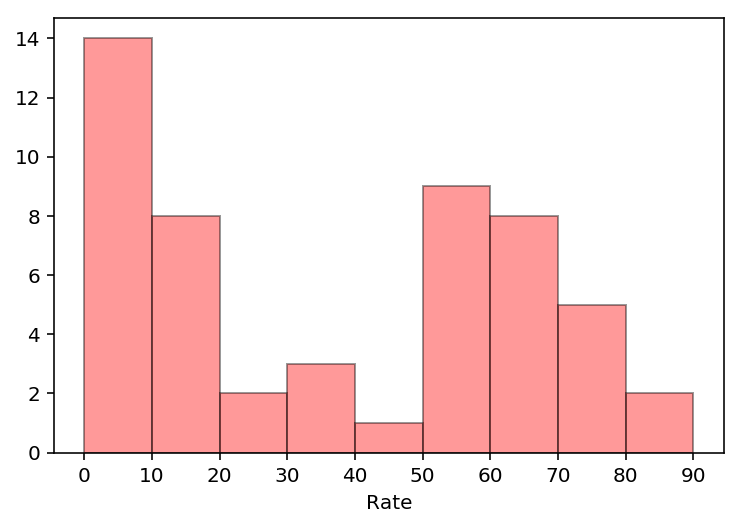

In [115]:
f, ax = plt.subplots(1,1)
ax = sns.distplot(sat['Rate'], bins=range(0,100,10), color='r', kde=False, hist_kws=dict(edgecolor="black", linewidth=1))
ax.set_xticks(range(0,100,10))


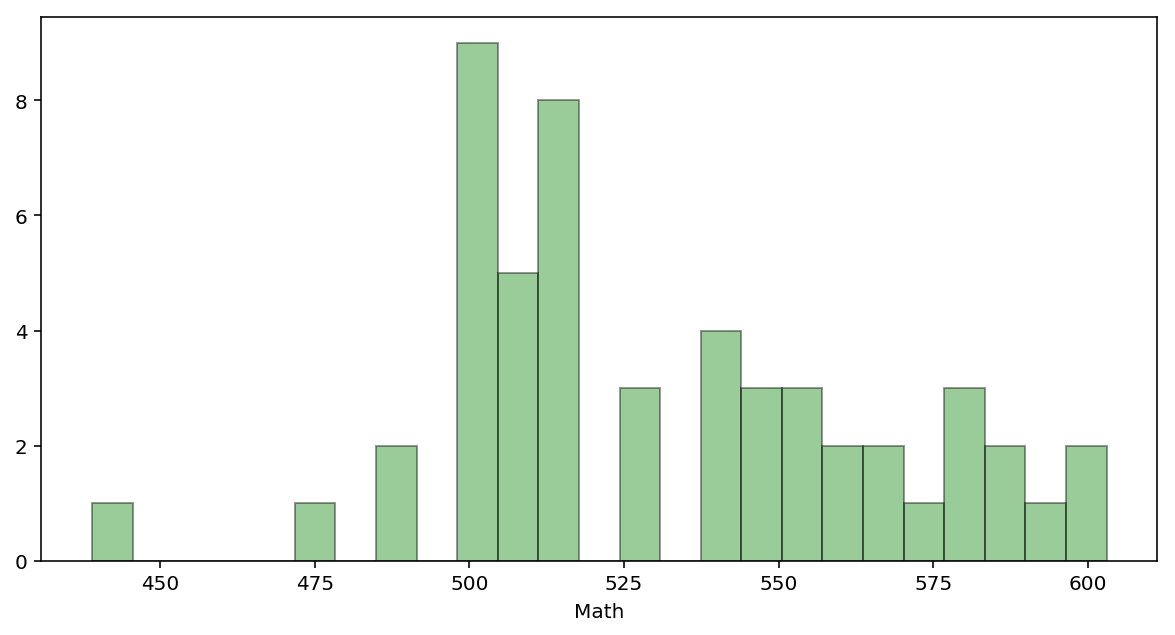

In [121]:
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.distplot(sat['Math'], bins=25, color='g', kde=False, hist_kws=dict(edgecolor="black", linewidth=1))

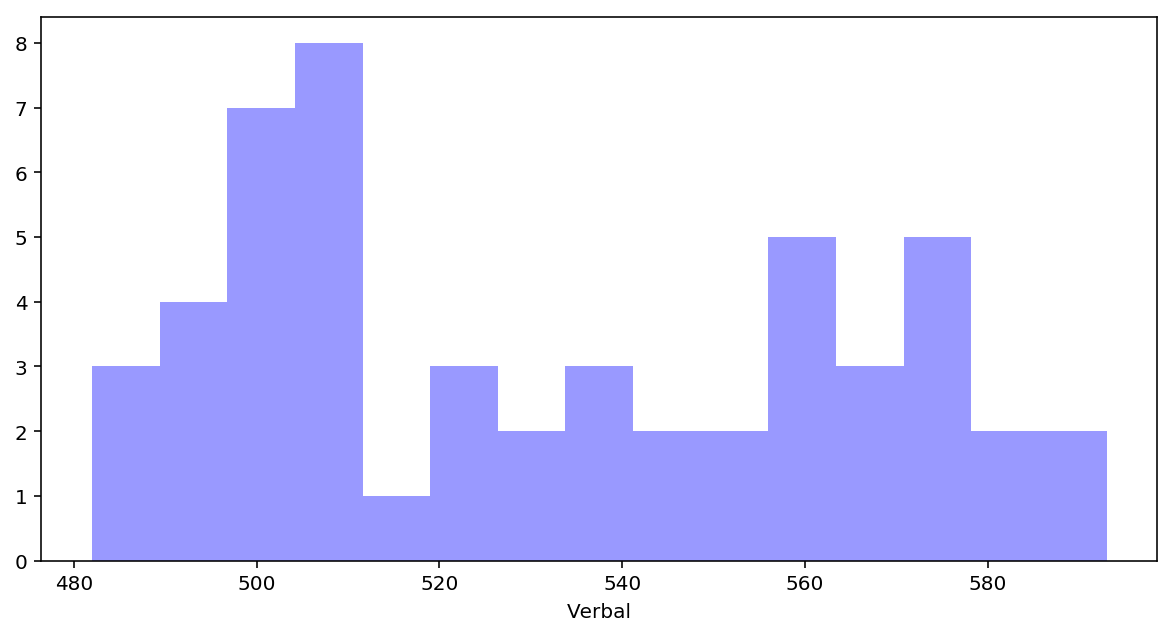

In [20]:
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.distplot(sat['Verbal'], bins=15, color='b', kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

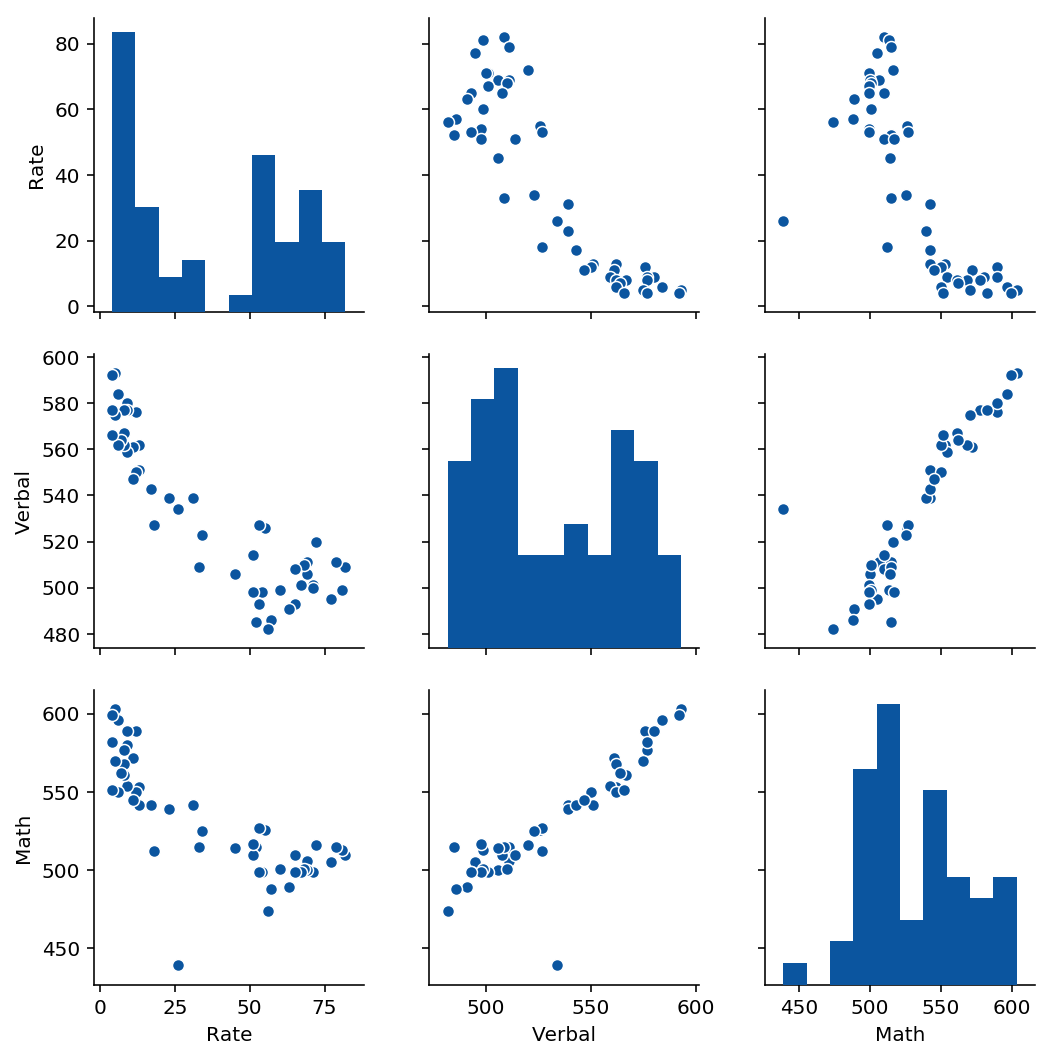

In [125]:
sns.pairplot(sat[['Rate','Verbal','Math']])

#### Explain what the visualization tells you about your data
#### ** Answer ** ####

- Student who scored well in verbal also scored well in mathematic -> Math and Verbal is positively correlated.

- Rate is negatively correlated for both verbal and math. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

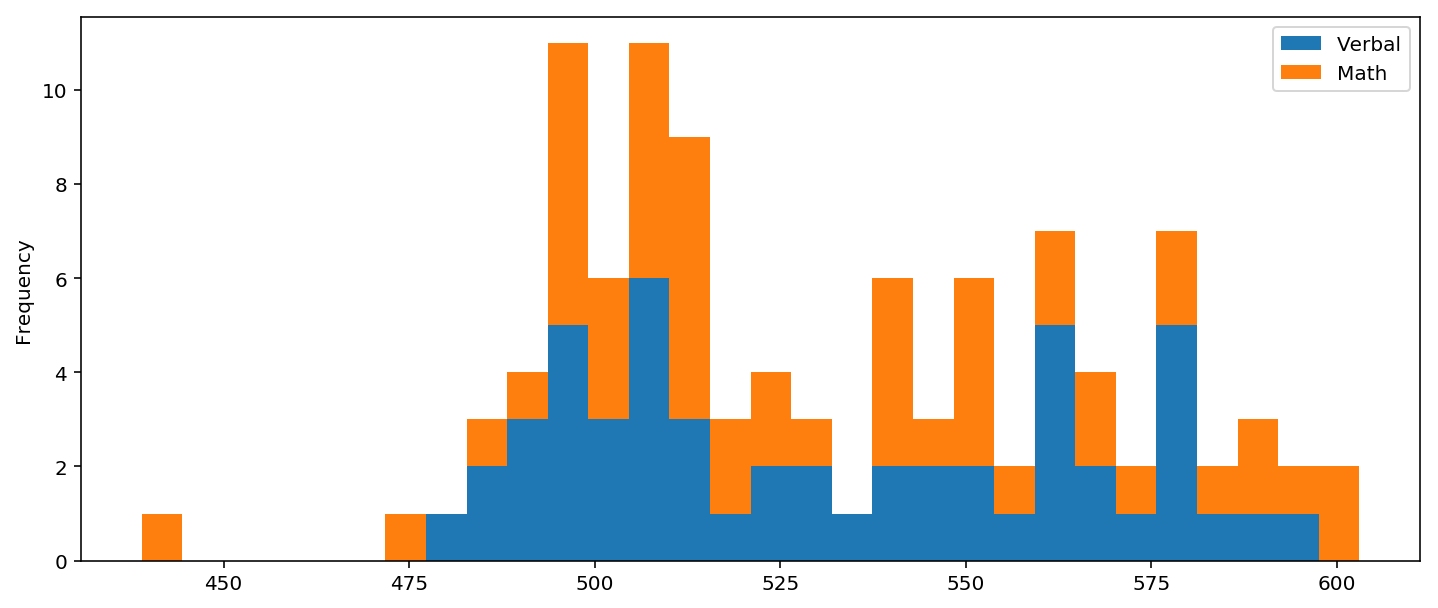

In [22]:
sat[['Verbal','Math']].plot(kind='hist', stacked=True, bins = 30, figsize=(12,5))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

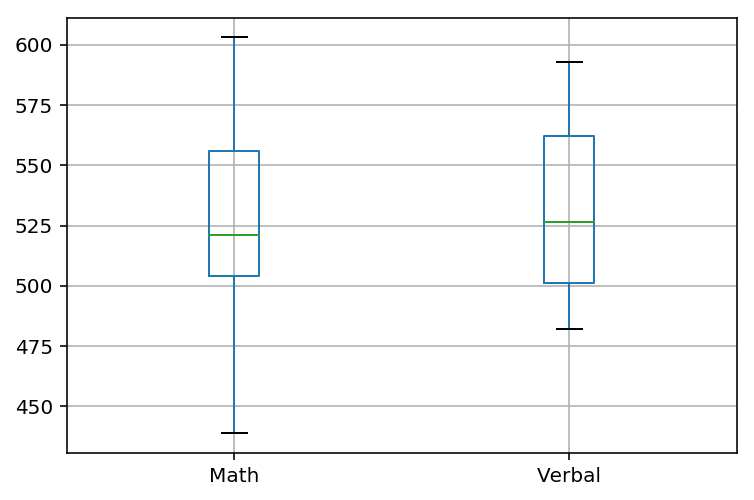

In [23]:
# sat.plot(kind='box')
sat.boxplot(column=['Math','Verbal'])

#####  What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

#### ** My Answer ** ###

Boxplot is useful for identifying trends when comparing between several data samples against each other. It also provides statistical properties like quantiles, median, etc. It can tell if the distribution is symmetrical or skewed. It helps identified any outliers in the dataset too.

Where as:
Histogram is useful when there is wide variances in a dataset. It also helps to identify presence of multiple modes, distribution, skew, center and spread of our data. It doesn't really helps in identifying outliers, etc... 

Where as:
Scatter plots show how much one variable is affected by another, i.e. correlation. It is more for finding out the relationships in the data as well as identifying outliers too.

#####  What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

#### ** Answer ** ###

Rate is on a different distribution range against Math and Verbal charts. 
Rate is from 0-100%; whereas Math and Verbal is between 200-800 range.

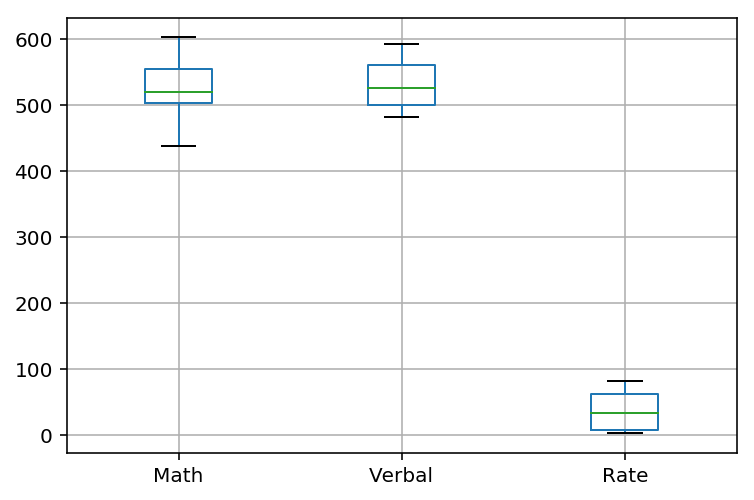

In [24]:
# sat.plot(kind='box')
sat.boxplot(column=['Math','Verbal','Rate'])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


#### ** Answer ** ###

*** Method 1: ***

The simplest way is to standardize all the variables. 
We can change both verbal and math scores values into percentage; (out of their total possible score of 800 points X 100). 

In this way, all 3 variables will be represented in the percentage range of 0-100%. It can then be plotted on the same boxplot chart. 

*** Method 2:   My preferred method ***

Using rescale the variables using "standardization," which forces the distribution of each of these 3 variables to have a mean of 0 and a standard deviation of 1.

Formulae is:
standardized_variable = (variable - mean_of_variable) / std_dev_of_variable

In [25]:
verbal_stan = (sat["Verbal"]-sat["Verbal"].mean())/sat["Verbal"].std()
math_stan = (sat["Math"]-sat["Math"].mean())/sat["Math"].std()
rate_stan = (sat["Rate"]-sat["Rate"].mean())/sat["Rate"].std()

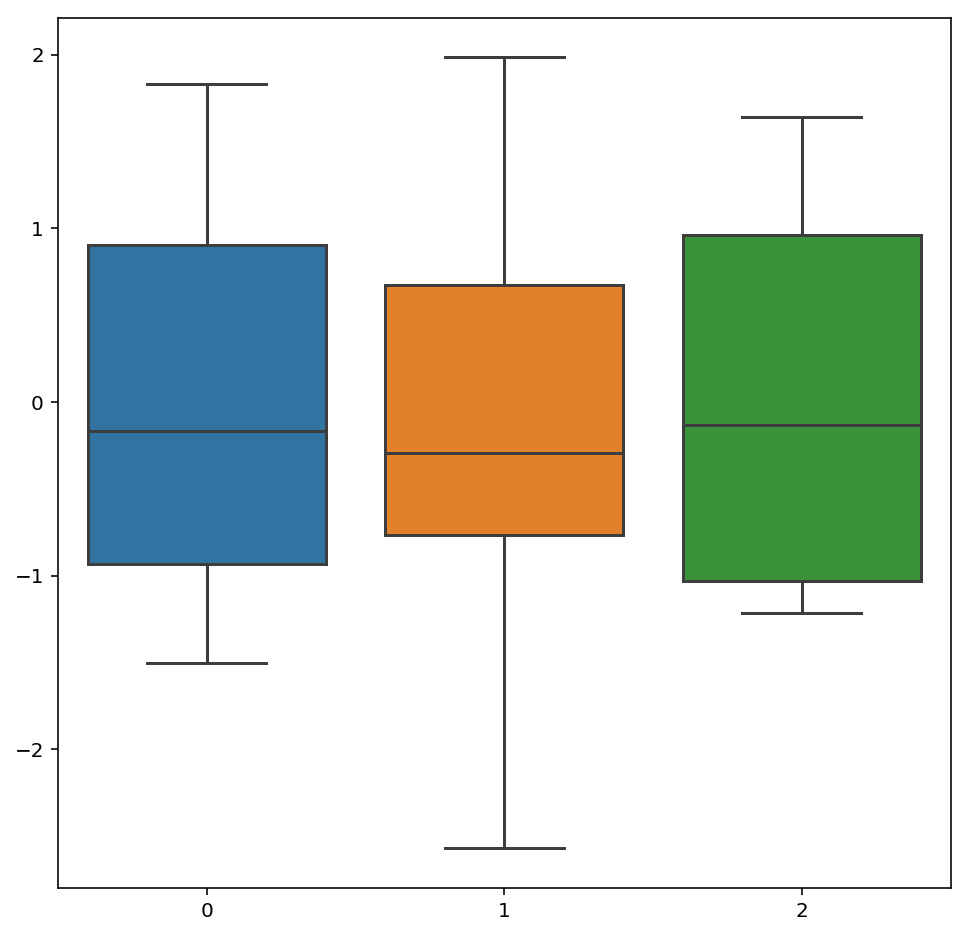

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=[verbal_stan,math_stan,rate_stan])
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




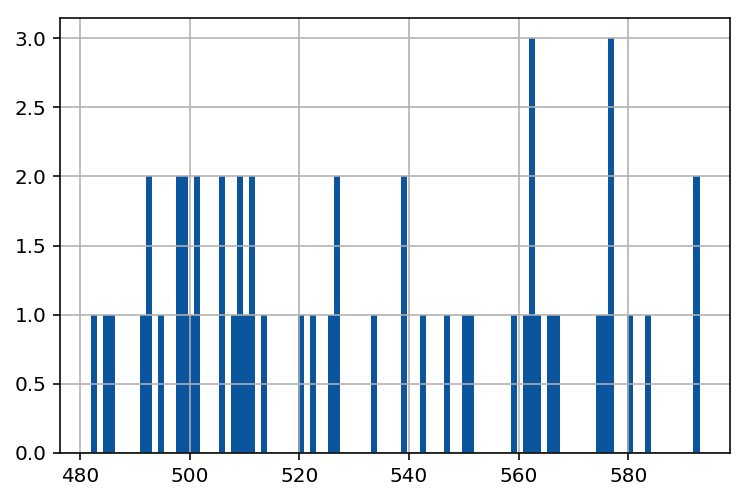

In [127]:
sat['Verbal'].hist(bins=100)   

In [28]:
verbal_mean = sat['Verbal'].mean()
verbal_mean

532.0192307692307

#### Can also use .loc function to list out.....it will return all other columns

In [29]:
# *** How many states are above the mean? 
satmean = sat[sat['Verbal']>verbal_mean]['State']
print('Mean for each state:\n', satmean)
print(satmean.count(),'states')      # print result of  24 states

Mean for each state:
 26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
24 states


#####  What does this tell you about the distribution of Verbal scores? 

##### ** Answer **

The mean is 532.01923. It can be treated that the distribution is not equally distributed. There is 24 states above the mean and 28 states below the mean. 
So it could be skewed. 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [30]:
verbal_median = sat['Verbal'].median()
verbal_median

526.5

In [31]:
# Find list of states that have Verbal scores greater than median of Verbal scores across states
satmedian = sat[sat['Verbal']>verbal_median]['State']
print('Mean for each state:\n', satmedian)
print(satmedian.count(),'states')      # print result of  26 states

Mean for each state:
 19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
26 states


In [32]:
sat['Verbal'].mode()

0    562
1    577
dtype: int64

##### How does this compare to the list of states greater than the mean of Verbal scores? Why?

#### ** Answer **

Since mean is greater than median here, we can infer that the distribution is right/positive skewed. 

However, running the mode function returned 2 points of 562 and 577 which is higher than mean and median, this indicates a bimodal distribution with 2 peaks.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [33]:
sat['Difference'] = sat['Verbal']-sat['Math']
sat.head(7)

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [34]:
subset_greater_than_math = sat[(sat['Verbal'] > sat['Math'])][["State","Difference"]].sort_values(by='Difference',ascending=False).head(10)

In [35]:
subset_less_than_math = sat[~(sat['Verbal'] > sat['Math'])][["State","Difference"]].sort_values(by='Difference',ascending=True).head(10)

In [36]:
subset_greater_than_math

,State,Difference
27,OH,95
29,WV,15
50,MS,15
45,AR,12
31,TN,9
9,VA,9
32,NM,9
16,DC,8
41,OK,6
8,ME,6


In [37]:
subset_less_than_math

,State,Difference
21,HI,-30
23,CA,-19
1,NJ,-14
33,IL,-13
44,WI,-12
36,MI,-11
3,NY,-10
47,IA,-10
37,MN,-9
51,All,-8


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [38]:
sat.loc[:,'Rate':].corr()

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Difference,-0.101412,0.052600,-0.388219,1.000000


### ** Answer **

    Rate and Verbal has strong negative correlation.
    Rate and Math has also strong negative correlation. 
          (But "slightly weaker" than the latter)
    Math and Verbal has strong position correlation


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [39]:
sat.describe()

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


#### ** Answer ** 

#### count   =  Total rows count - for each column
#### mean   =  Return the mean  -  for all values in each column
#### std       =  Return the Standard Deviation away from the mean
#### min      =  Minimum value of each series/column
#### 25%     =  25% percentile value (1st quartile)
#### 50%     =  50% percentile value (2nd quartile)
#### 75%     =  75% percentile value (3rd quartile)
#### max     =  Maximum value of each series/column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [40]:
sat.loc[:,'Rate':'Math'].cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


#### ** Answer ** ###

Covariance measures the variance between 2 variables. It is a statistical term, defined as a systematic relationship between a pair of random variables, covariance indicates how two variables are related. A positive covariance means the variables are positively related, while a negative covariance means the variables are inversely related. However, it cannot tell us how much the selected two variables are related, we are not able to measure degree of correlation based on covariance.¶

Correlation is described as a measure in statistics, which determines the degree to which two or more random variables move in tandem. It provides us with a quantitative expression of how much two variables are related. It measures the degree that provides a measure to represent how much 2 variables are correlated in range [-1.1].

In this case, correlation of two variables is obtained by diving the Covariance of two variables over the square root of the product of the variance of both variables. covariance(x,y)/[(STDx) * (STDy)]

Correlation is a pure measure of association, whereas covariance is measured in the units of two variables multipled. Hence that is why correlation matrix is preferred over covariance matrix.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [41]:
# Reading into Dataframe with read_csv function 
# While reading file, fill NaN if '-' character is found. 0 will affect mean, median, etc.   
drug = pd.read_csv(file_path_drug,sep=',',na_values='-')     

In [42]:
print(drug.shape,'\n')
print(drug.columns,'\n')
print(drug.head(),'\n')
print(drug.dtypes,'\n')
print(drug.get_dtype_counts(),'\n')
print(drug.info(),'\n')
drug_stat = drug.describe()           # for displaying statistic data from later on
print(drug_stat,'\n')

(17, 28) 

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object') 

  age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-freque

#### ** Answer ** ###

    * We need to perform data cleansing before doing analysis. Fill Nan where there is '-'. Some columns data types is string where they suppose to be floats. Can't fill 0 as it will affect statistic data like mean, median
    
    * Age column is strings and n is sample size number which is integer so no cleansing needed.

In [43]:
# Convert to float, fill NaN if error encounters! This is my second method to convert '-' to NaN
for col in drug.columns[2:]:
    drug[col] = pd.to_numeric(drug[col],errors='coerce')   

#
use this function to split and get only drug name 
    # drug_use.rename(columns=lambda x: x.split('-')[0], inplace=True)

In [44]:
# Rename to shorter name using dictionary substitution method instead of list replacement method.
drug = drug.rename(columns=        
        {'age':'age', 
         'n':'num', 
         'alcohol-use':'alco', 
         'alcohol-frequency':'alco_f', 
         'marijuana-use':'mari', 
         'marijuana-frequency':'mari_f', 
         'cocaine-use':'coke',
         'cocaine-frequency':'coke_f', 
         'crack-use':'crac', 
         'crack-frequency':'crac_f', 
         'heroin-use':'hero', 
         'heroin-frequency':'hero_f', 
         'hallucinogen-use':'hall',
         'hallucinogen-frequency':'hall_f', 
         'inhalant-use':'inha', 
         'inhalant-frequency':'inha_f', 
         'pain-releiver-use':'pain', 
         'pain-releiver-frequency':'pain_f',
         'oxycontin-use':'oxy',
         'oxycontin-frequency':'oxy_f', 
         'tranquilizer-use':'tran', 
         'tranquilizer-frequency':'tran_f', 
         'stimulant-use':'stim', 
         'stimulant-frequency':'stim_f', 
         'meth-use':'meth', 
         'meth-frequency':'meth_f',
         'sedative-use':'seda', 
         'sedative-frequency':'seda_f'
        })
# If time allows, I will try using lambda with replace function within rename function here.  

In [45]:
drug.drop(columns=['num'],inplace=True) 
drug_copy = drug       # make a copy of raw drug data 

In [46]:
drug_stat              # display statistic data from earlier describe function

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,...,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,...,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,...,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,...,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,...,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### ***Assumptions & Limitation:  
    #  Major wants to move "needle" when there is high drug abuse.
    #  Given that SAT is normally taken around the around of the age of 17-18. 
    #  We can exclude data between 12-16 => Remove groups >= 16.
    #  Group 65+ data not making sense with many zeroes/nulls => Remove age groups 65+
    #  Excluding alcohol, marijuana and inhalant as these 3 do not involves needles use. 
    #  Since alcohol & marijuana both have highest rate of abuses with median of 64.6% and 20.8% respectively, we can remove both to further investigate on "needles" related drugs abuses. 

In [47]:
for i in range(5):                          # Dropping rows 0 to 4 for all age groups between 12 to 16 years old
    drug = drug.drop(i)  

In [48]:
drug = drug.drop(16)                        # Dropping age group 65+ as 
drug.reset_index(drop=True,inplace=True)    # Reset index to start from 0 again.

In [49]:
# Excluding alcohol, marijunana, inhalant as they don't involves needles.
subset_use = drug[['age','coke','crac','hero','hall','pain','oxy','tran','stim','meth','seda']]

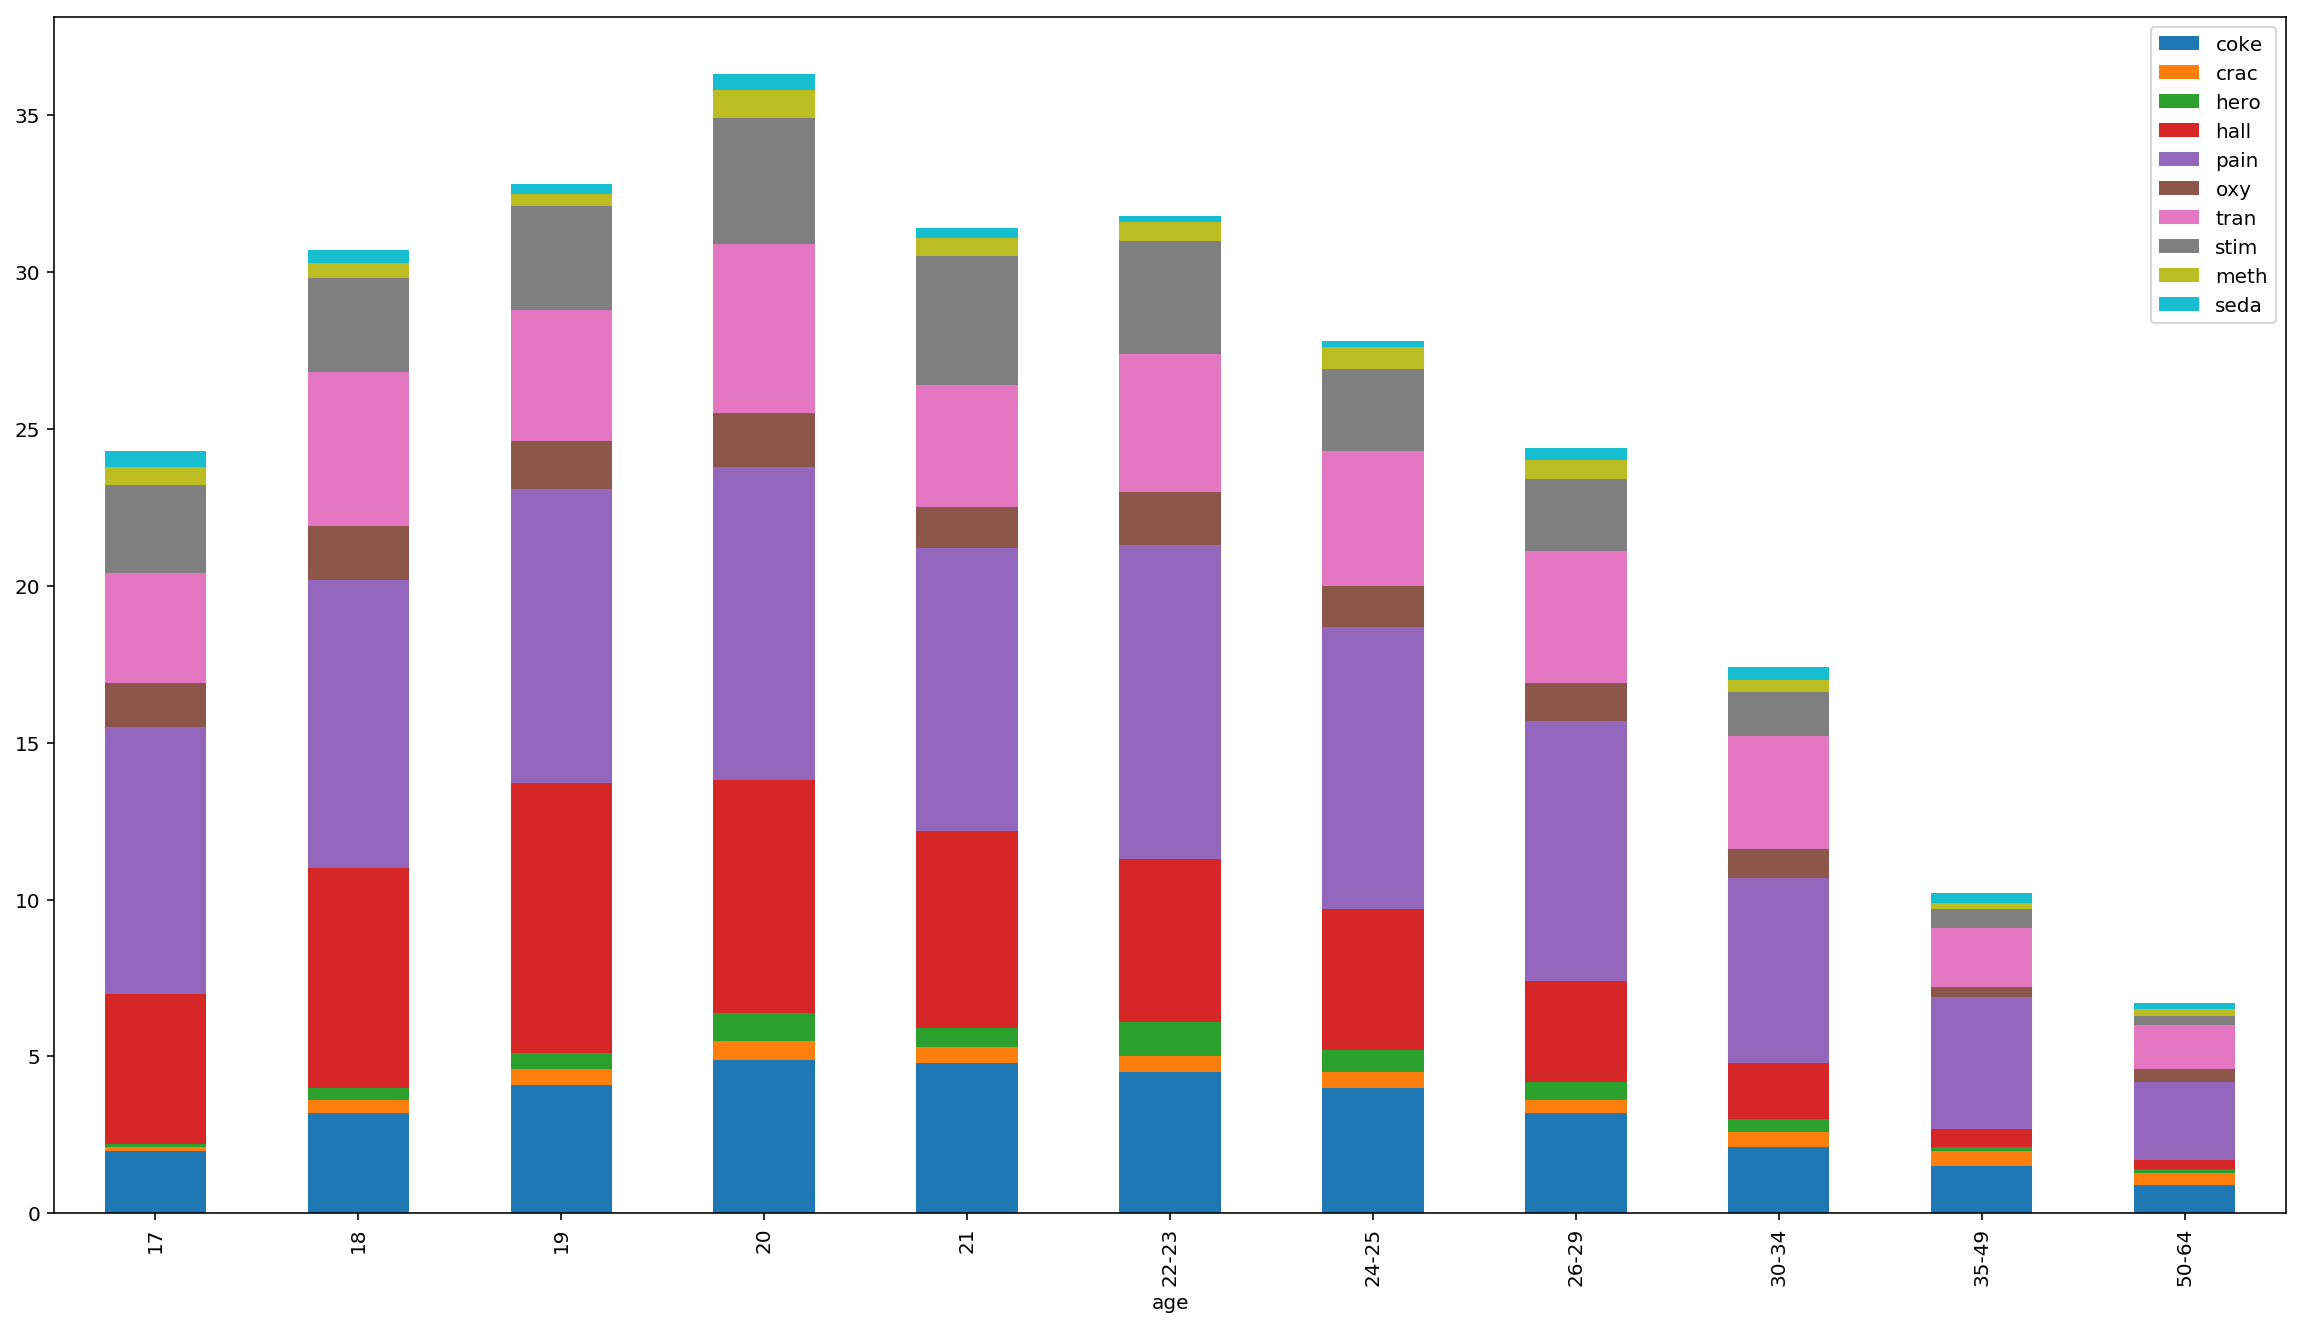

In [50]:
subset_use.plot('age', kind='bar', figsize=(20, 11), stacked=True, legend=True)

    #  Drugs abused seems to peaked around the age groups between 18-23 years old (right after high school). 
    #  Opiate pain-relievers recreation drug abuse is among the highest, follow by hallucinogen abuse. 
    #  There is also increasing abuse of cocaine and tranquilizer 
    #  This seems to imply that opiate pain-relievers is the most abused drug after alcohol and marijuana    

In [51]:
# Take a look at the "abuse frequency" among all drugs to identity high needle usage.
subset_freq = drug[['age','coke_f','crac_f','hero_f','hall_f','inha_f','pain_f','oxy_f','tran_f','stim_f','meth_f','seda_f']]

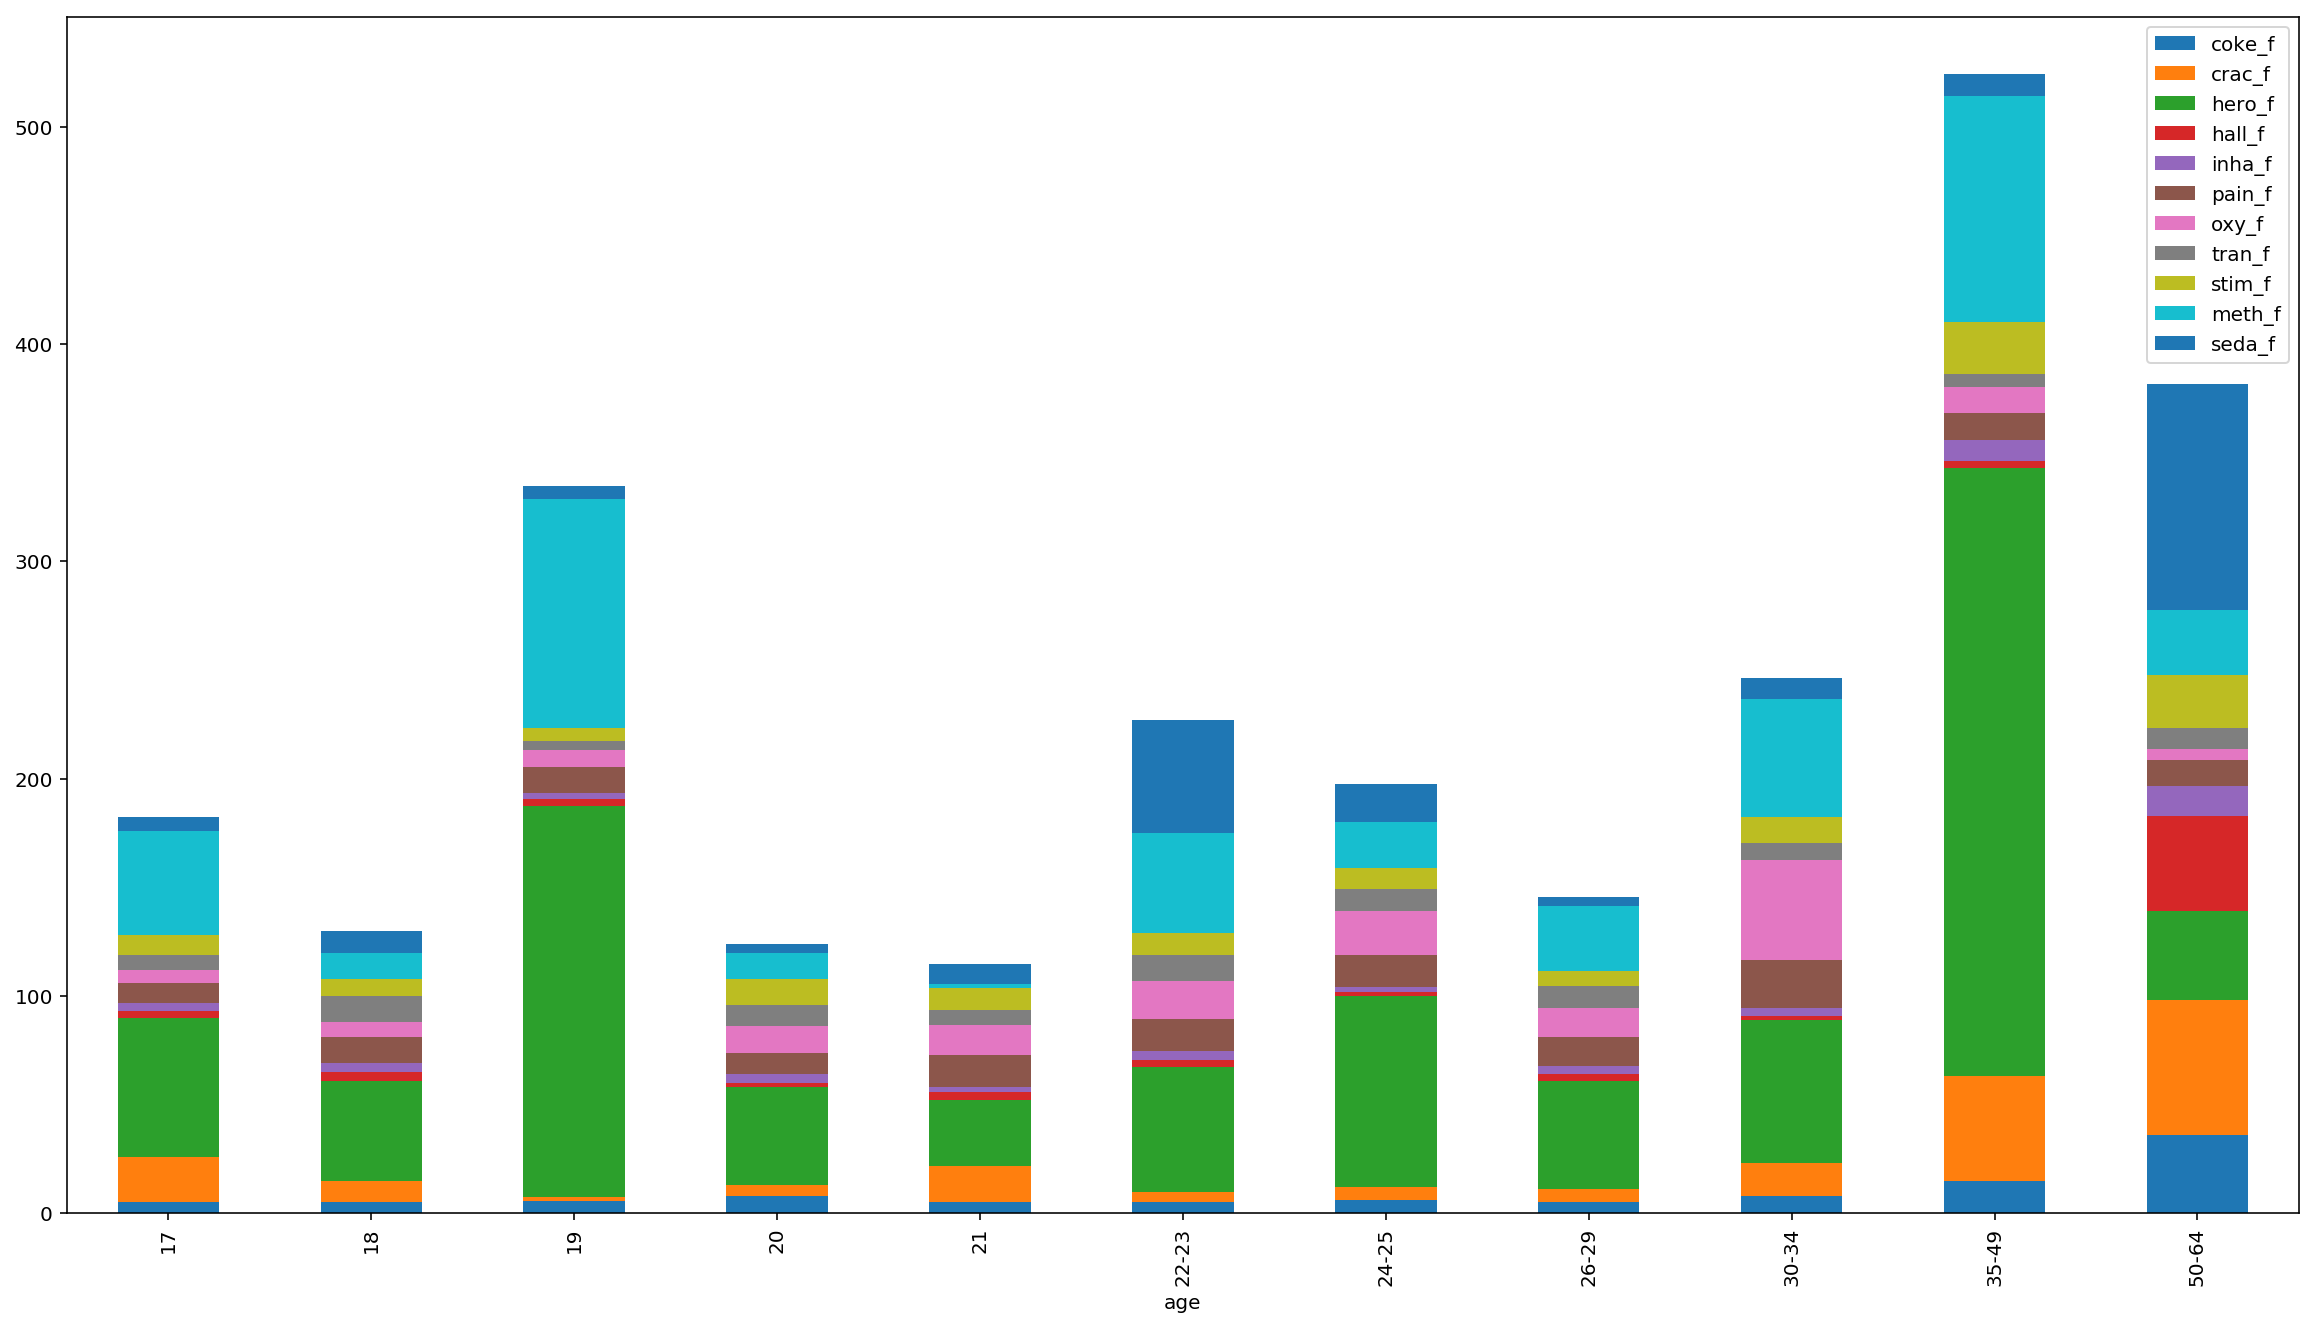

In [52]:
subset_freq.plot('age', kind='bar', figsize=(20, 11), stacked=True, legend=True)

    #  From above chart of "Median number of times a user in an age group used drugs in the past 12 months"  
    #  Heroin users tend to repeatingly abusing it at the highest frequency than other drugs, even though heroin addiction 
    #  number is not as high in comparison to pain-killers abuse (in the previous chart). 
    #  This seems to imply that heroin is the most addictive drug where needle would be used. Meth-use is next in line.
    #  Age group to monitor would be "19" and the age group "35-39"

In [ ]:
# Edo charts of multiple lines complex charting in one of the solution examples

for drugs in subset_use:
    plt.figure(figsize=(10,5))
    df_genre = df[df['drugs']==drugs].reset_index(drop=True).copy()
    for i in range(len(df_genre)):
        row = df_genre.loc[i]
        values = 100 - row.fillna(100).values[7:]
        x = range(1,len(values)+1)
        plt.plot(x,values,lw=1, alpha=0.5,c='purple')
    plt.yticks(range(0,100+1,10), range(100,0-1,-10))
    plt.title(genre)
    plt.xlabel('week')
    plt.ylabel('position')
    plt.show()

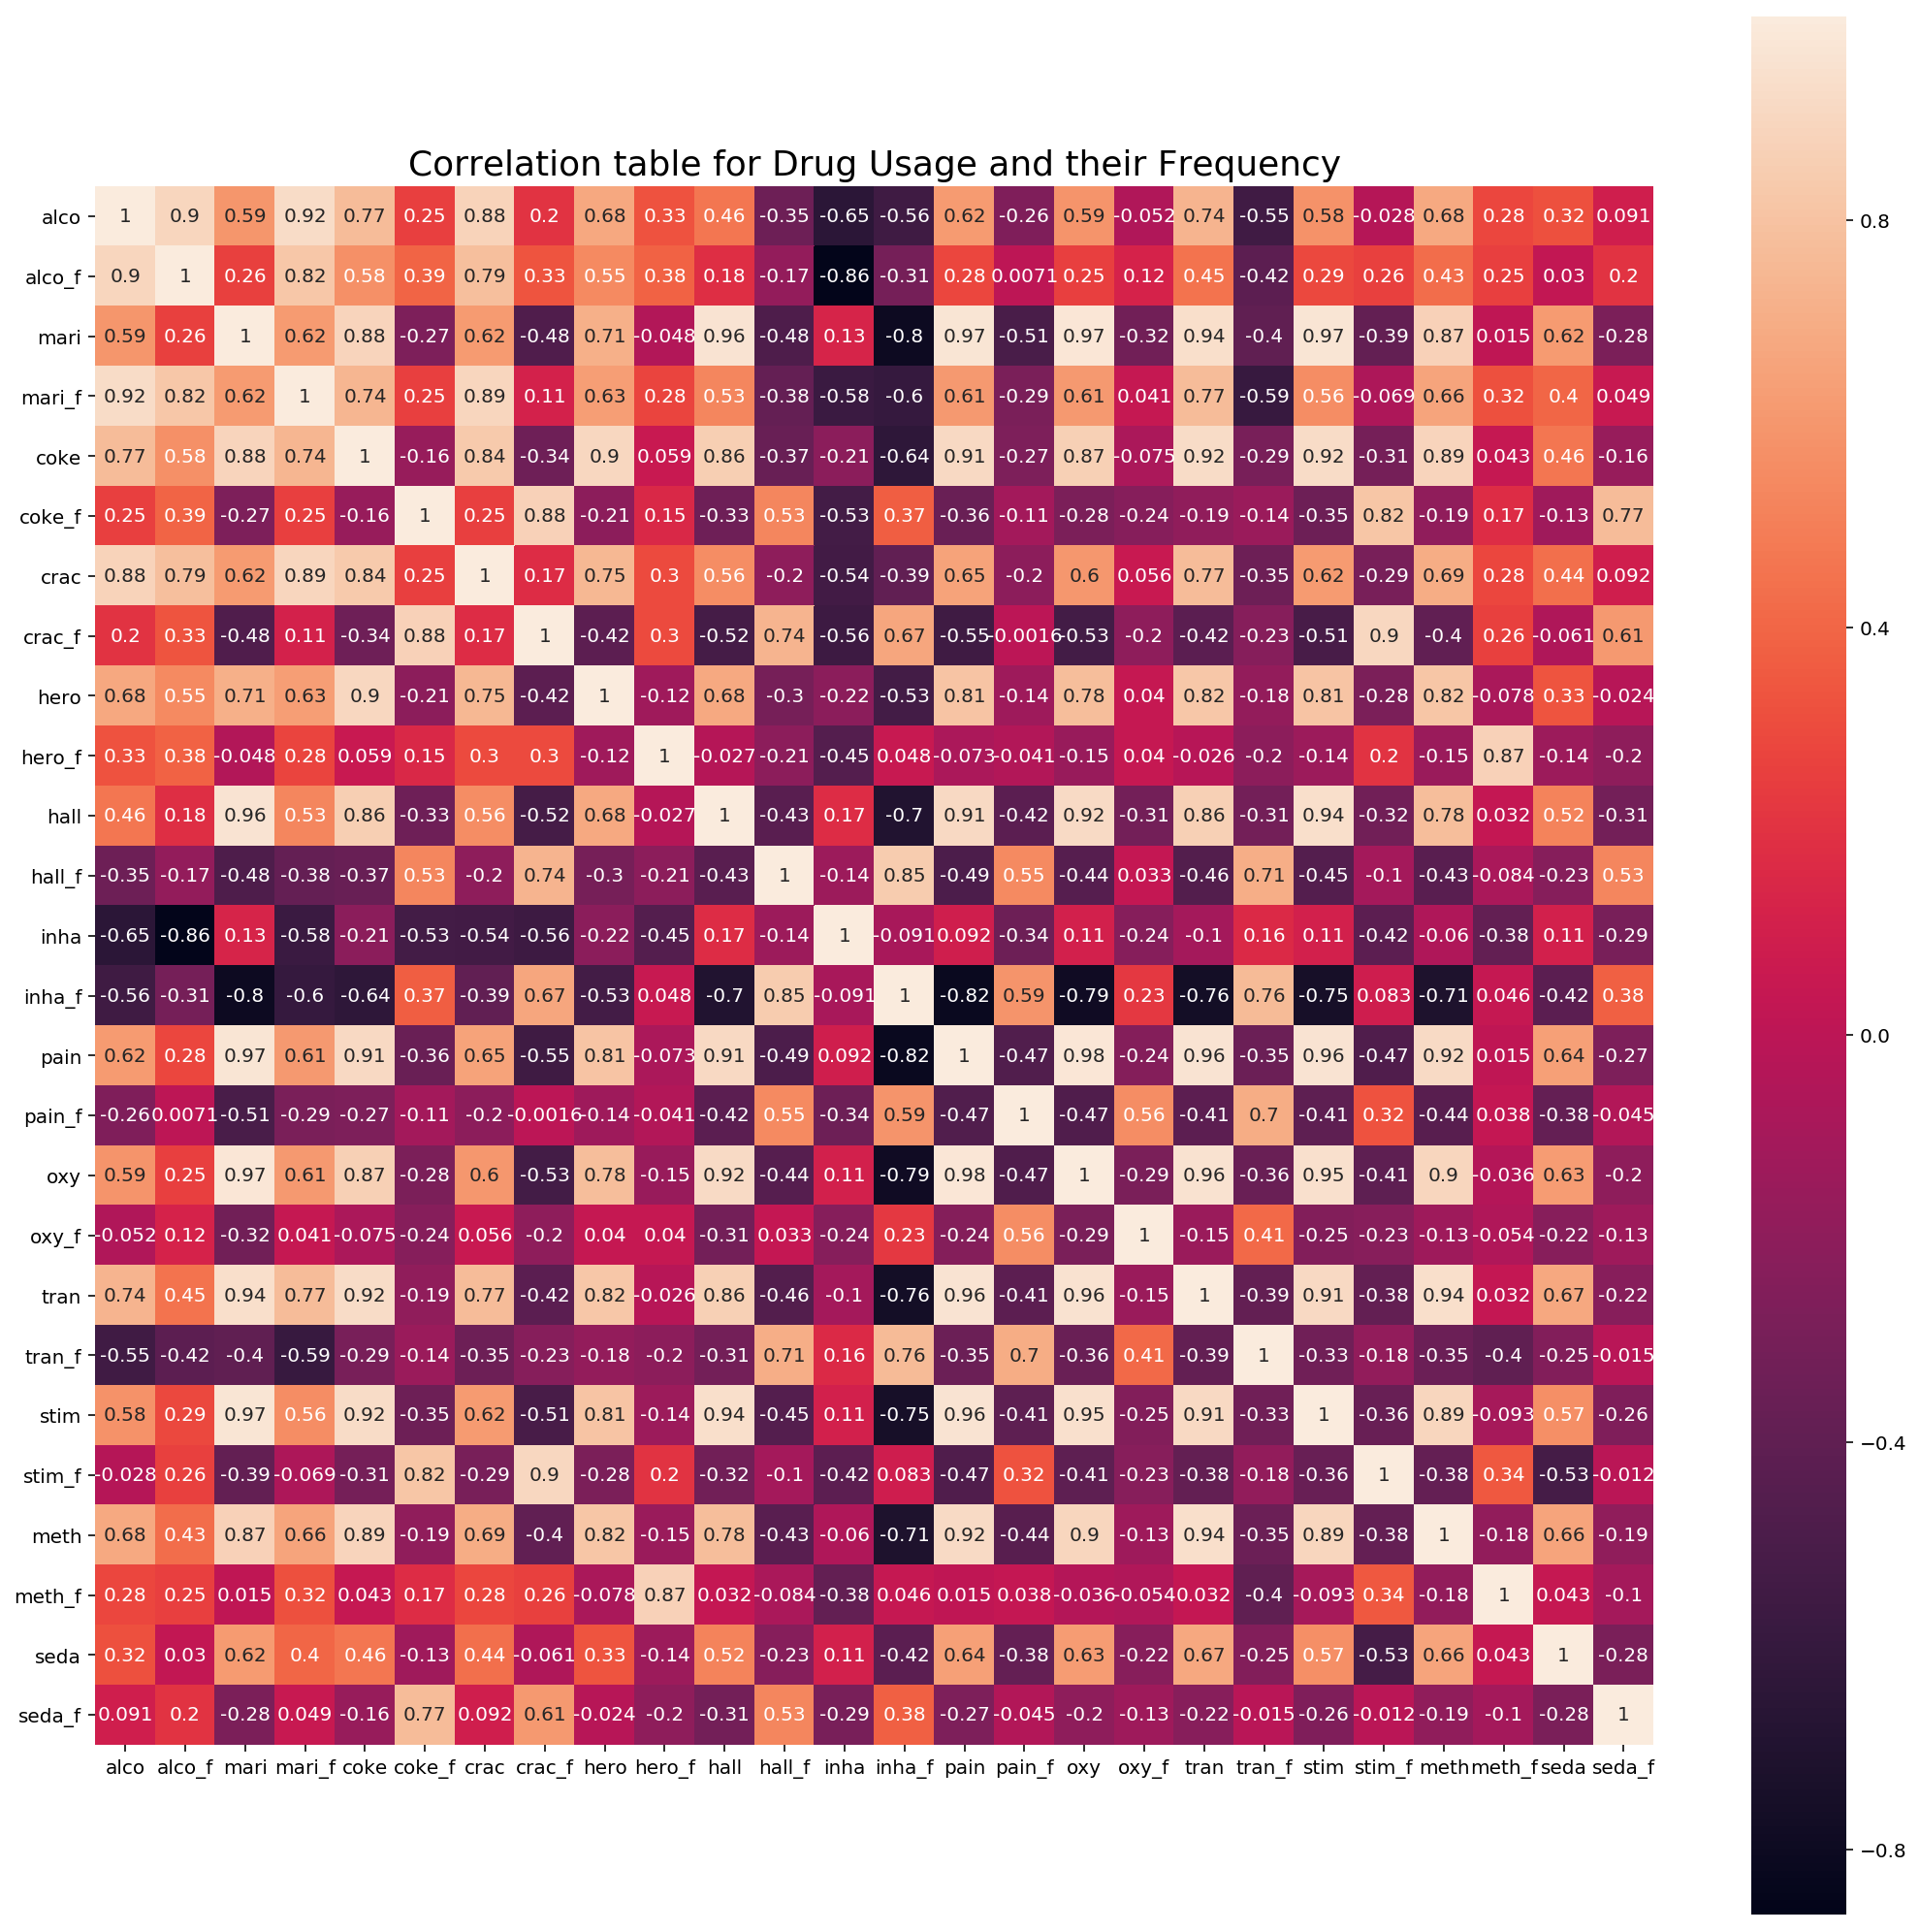

In [53]:
# To see if there is correlation relatiionship between various drugs, use heatmap with correlation coefficents.
plt.figure(figsize=(18,18))
plt.title('Correlation table for Drug Usage and their Frequency',y=1,size=18)
sns.heatmap(drug_copy.corr(), square = True, vmax=1, annot=True)

#### ** Answer ** ###

    Correlation relationship between a pair of drugs' usage VS a pair of drugs' frequency
    =============================================================================================
    alcohol-use vs marijuana-use : 0.59                                - (+) Positive Correlation
    alcohol-frequency vs marijuana-frequency : 0.82                    - (+) Positive Correlation
    marijuana-use vs cocaine-use : 0.88                                - (+) Positive Correlation
    marijuana-frequency vs cocaine-frequency : 0.25                    - (+) Positive Correlation
    cocaine-use vs crack-use : 0.84                                    - (+) Positive Correlation
    cocaine-frequency vs crack-frequency : 0.88                        - (+) Positive Correlation
    crack-use vs heroin-use : 0.75                                     - (+) Positive Correlation
    crack-frequency vs heroin-frequency : 0.33                         - (+) Positive Correlation
    heroin-use vs hallucinogen-use : 0.68                              - (+) Positive Correlation
    heroin-frequency vs hallucinogen-frequency : -0.21                 - (-) Negative Correlation
    hallucinogen-use vs inhalant-use : 0.17                            - (+) Positive Correlation
    hallucinogen-frequency vs inhalant-frequency : 0.85                - (+) Positive Correlation
    inhalant-use vs pain-releiver-use : 0.092                          - (+) Positive Correlation
    inhalant-frequency vs pain-releiver-frequency : 0.59               - (+) Positive Correlation
    pain-releiver-use vs oxycontin-use : 0.98                          - (+) Positive Correlation
    pain-releiver-frequency vs oxycontin-frequency : 0.56              - (+) Positive Correlation
    oxycontin-use vs tranquilizer-use : 0.96                           - (+) Positive Correlation
    oxycontin-frequency vs tranquilizer-frequency : 0.41               - (+) Positive Correlation
    tranquilizer-use vs stimulant-use : 0.91                           - (+) Positive Correlation
    tranquilizer-frequency vs stimulant-frequency : -0.18              - (-) Negative Correlation
    stimulant-use vs meth-use : 0.89                                   - (+) Positive Correlation
    stimulant-frequency vs meth-frequency : 0.34                       - (+) Positive Correlation
    meth-use vs sedative-use : 0.66                                    - (+) Positive Correlation
    meth-frequency vs sedative-frequency : -0.1                        - (-) Negative Correlation
    =============================================================================================

In [54]:
all_used = drug_copy[['age','alco','mari','coke','crac','hero','hall','inha','pain','oxy','tran','stim','meth','seda']]
all_freq = drug_copy[['age','alco_f','mari_f','coke_f','crac_f','hero_f','hall_f','inha_f','pain_f','oxy_f','tran_f','stim_f','meth_f','seda_f']]

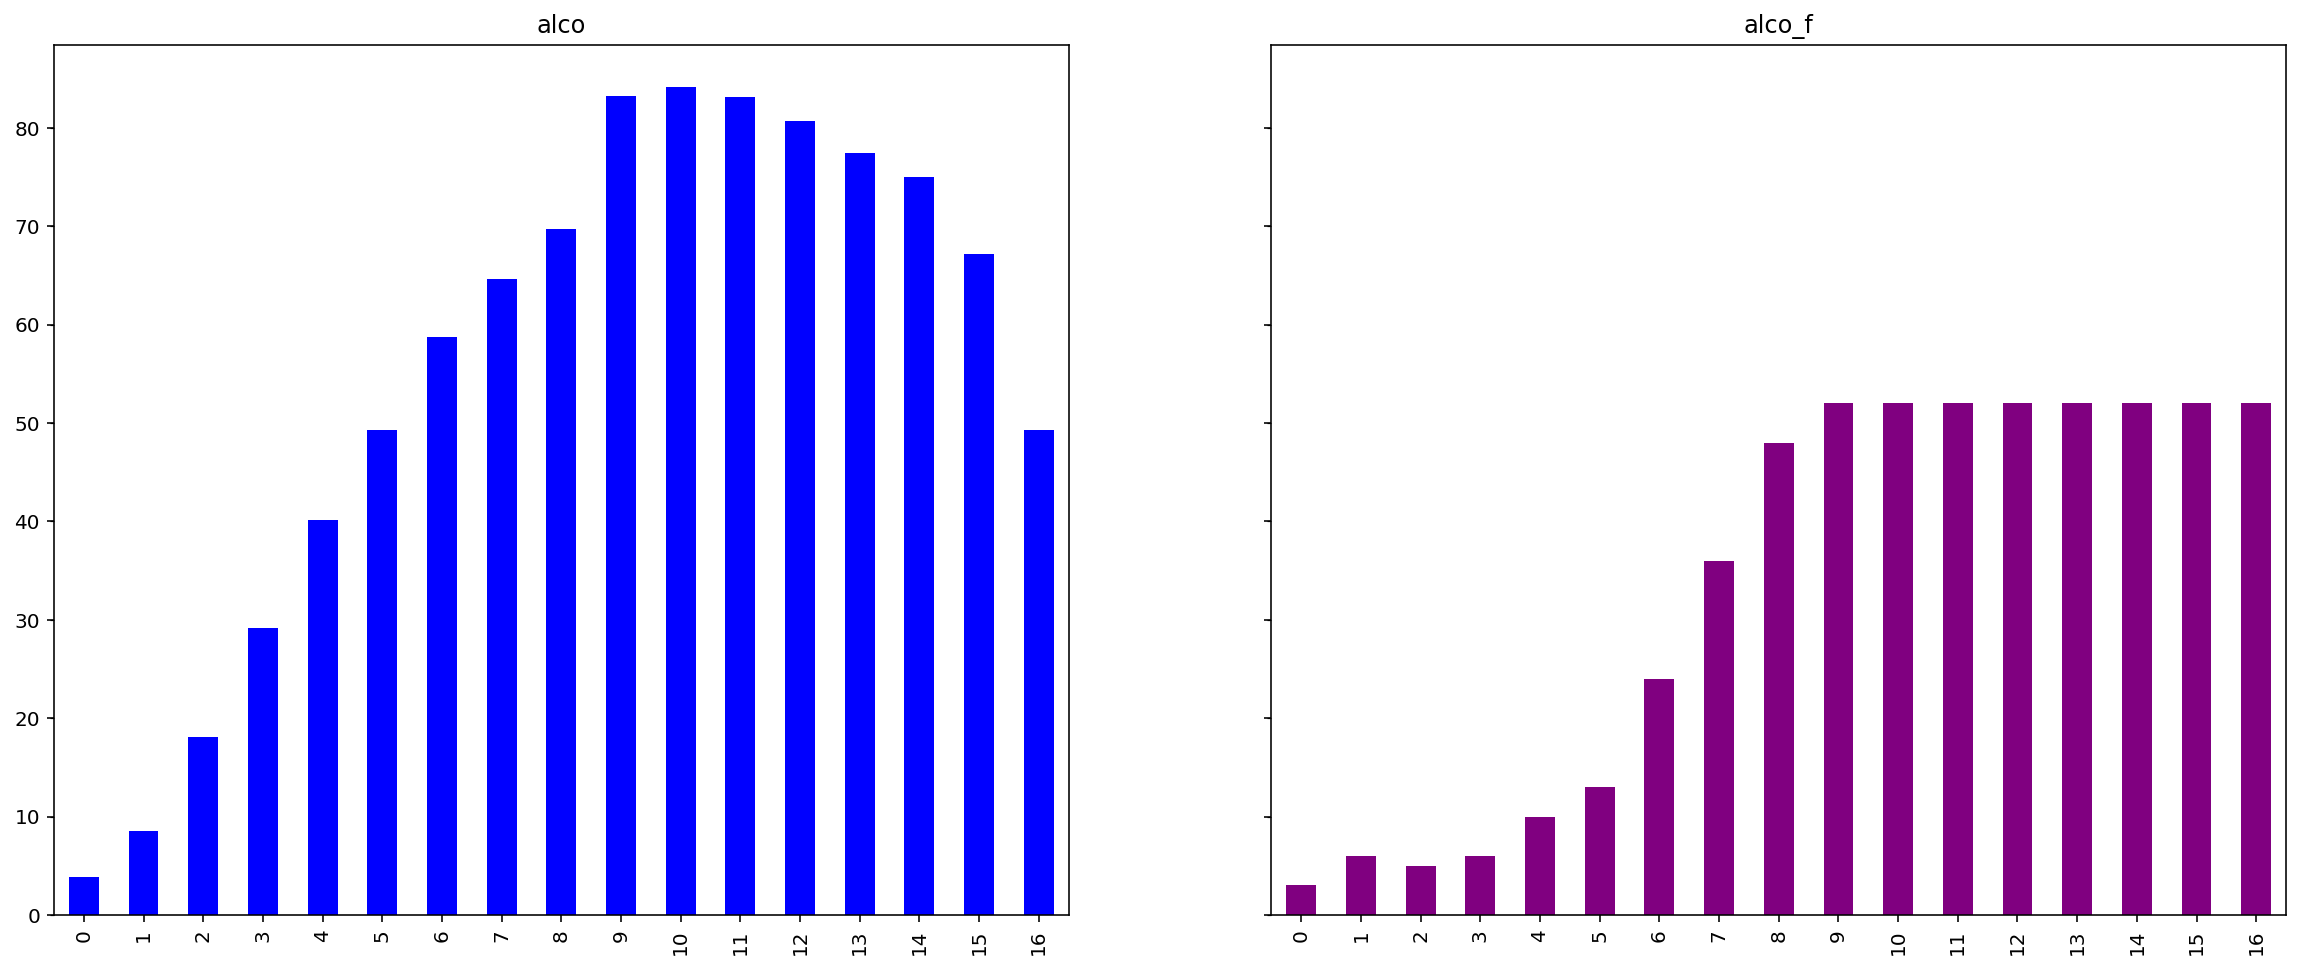

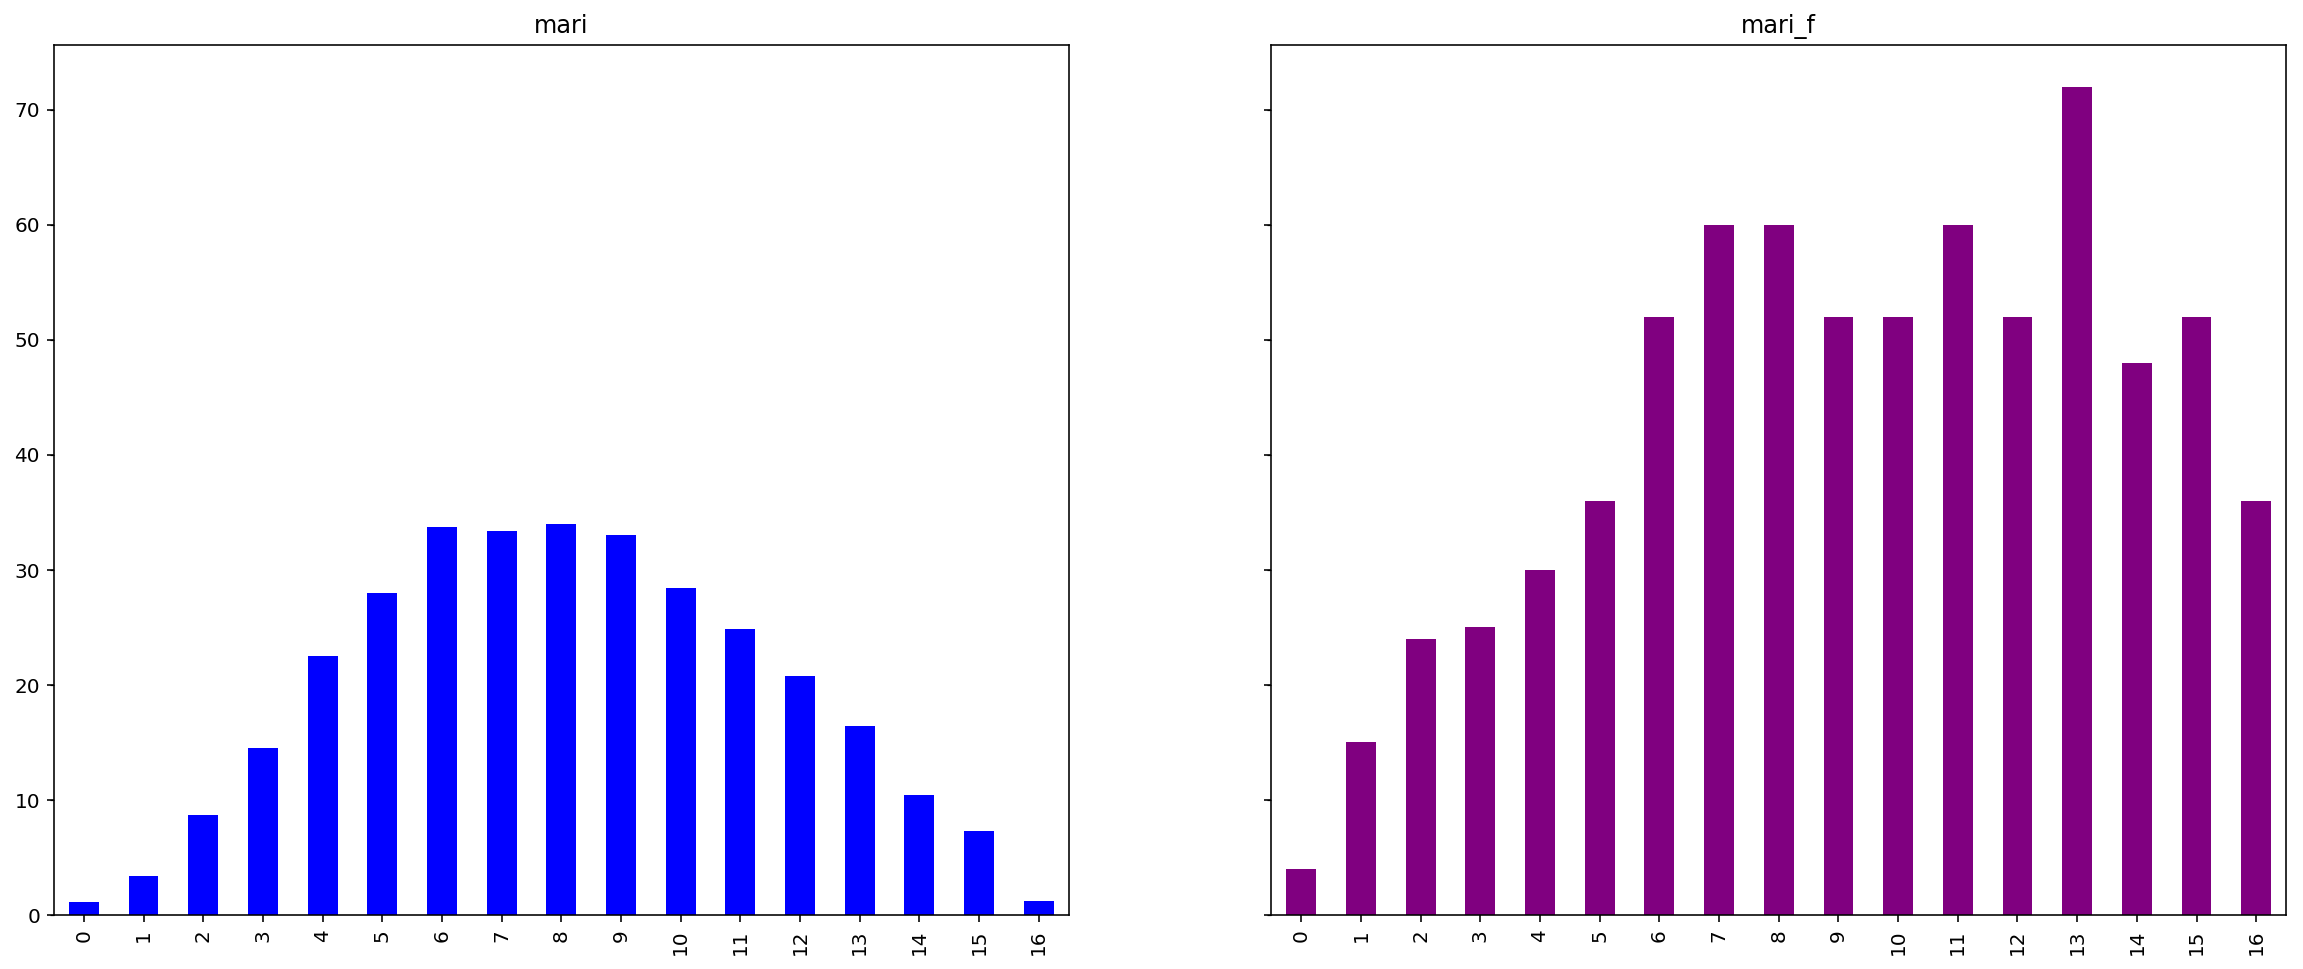

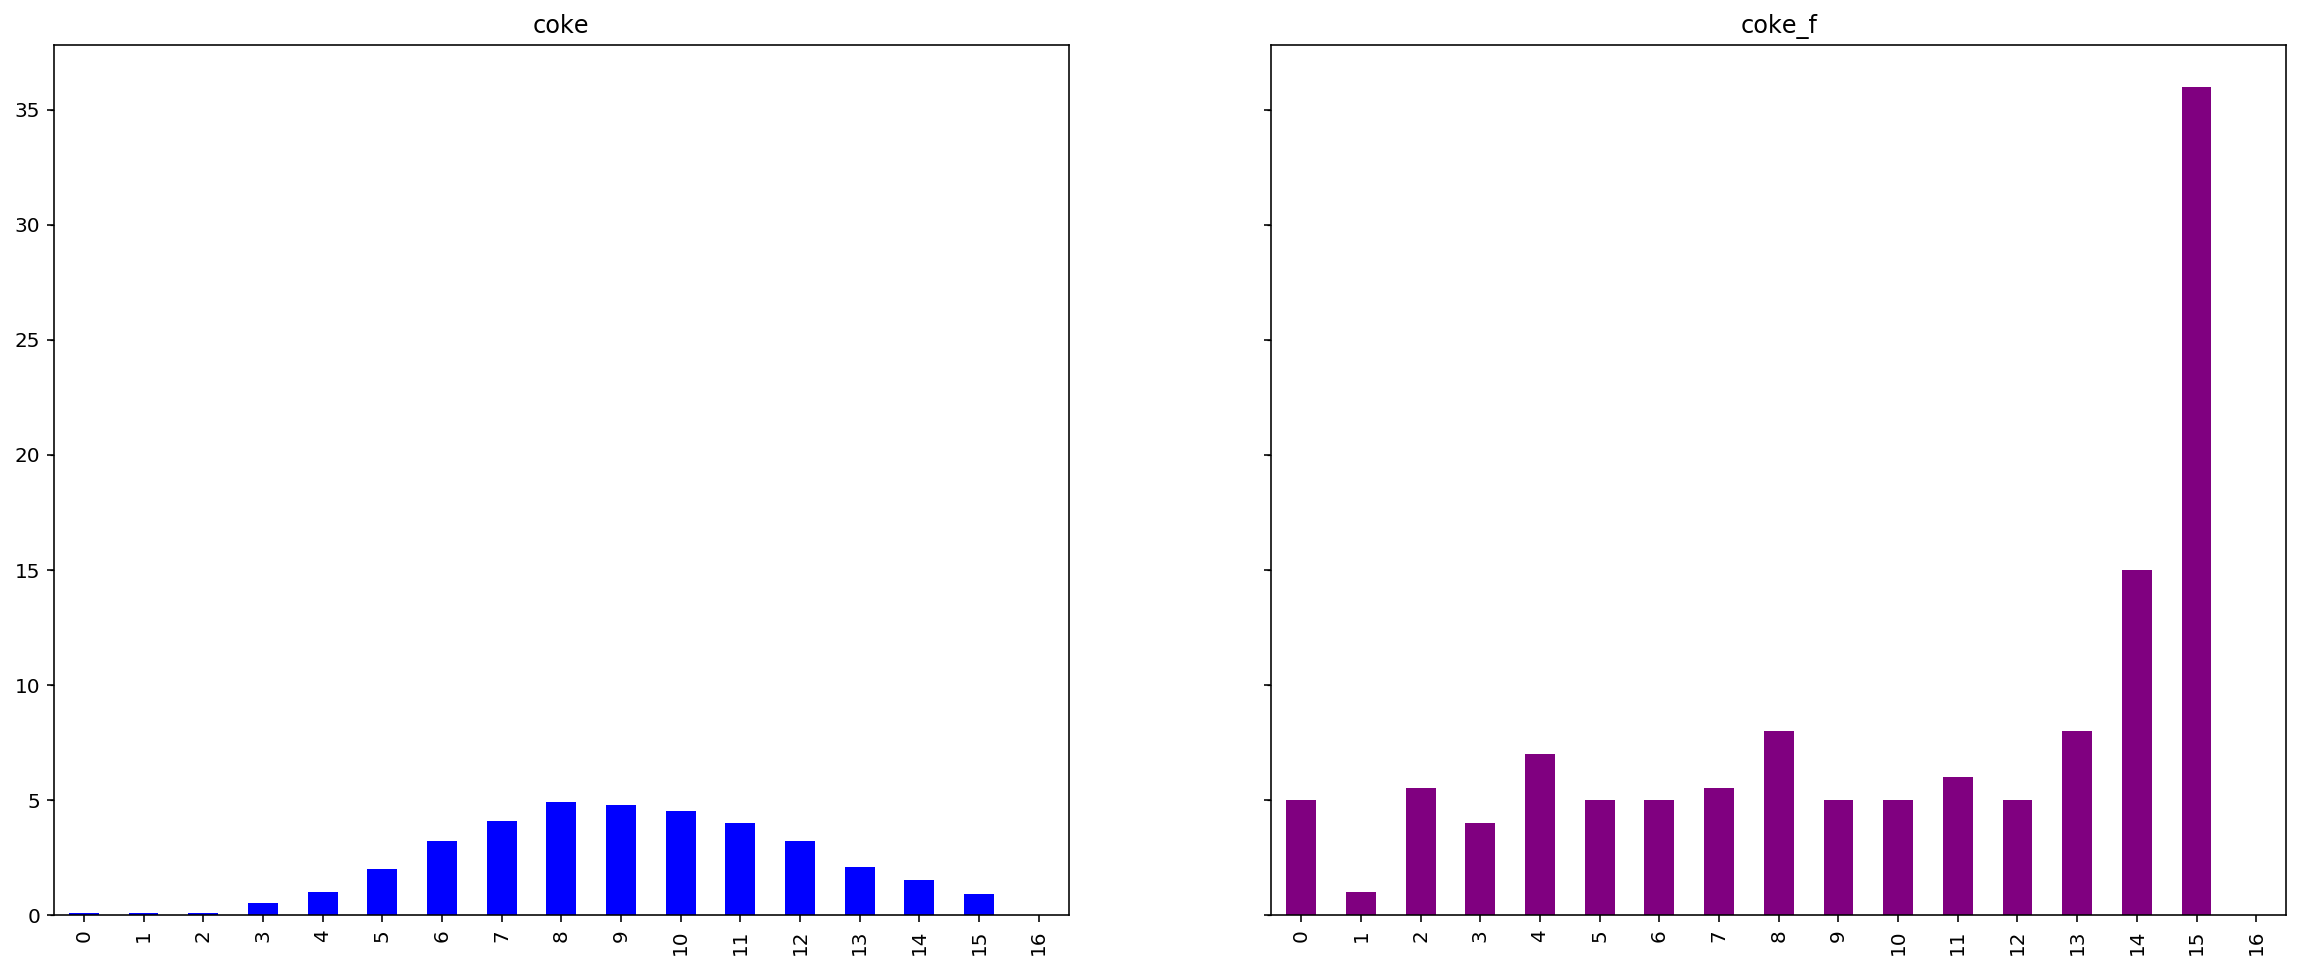

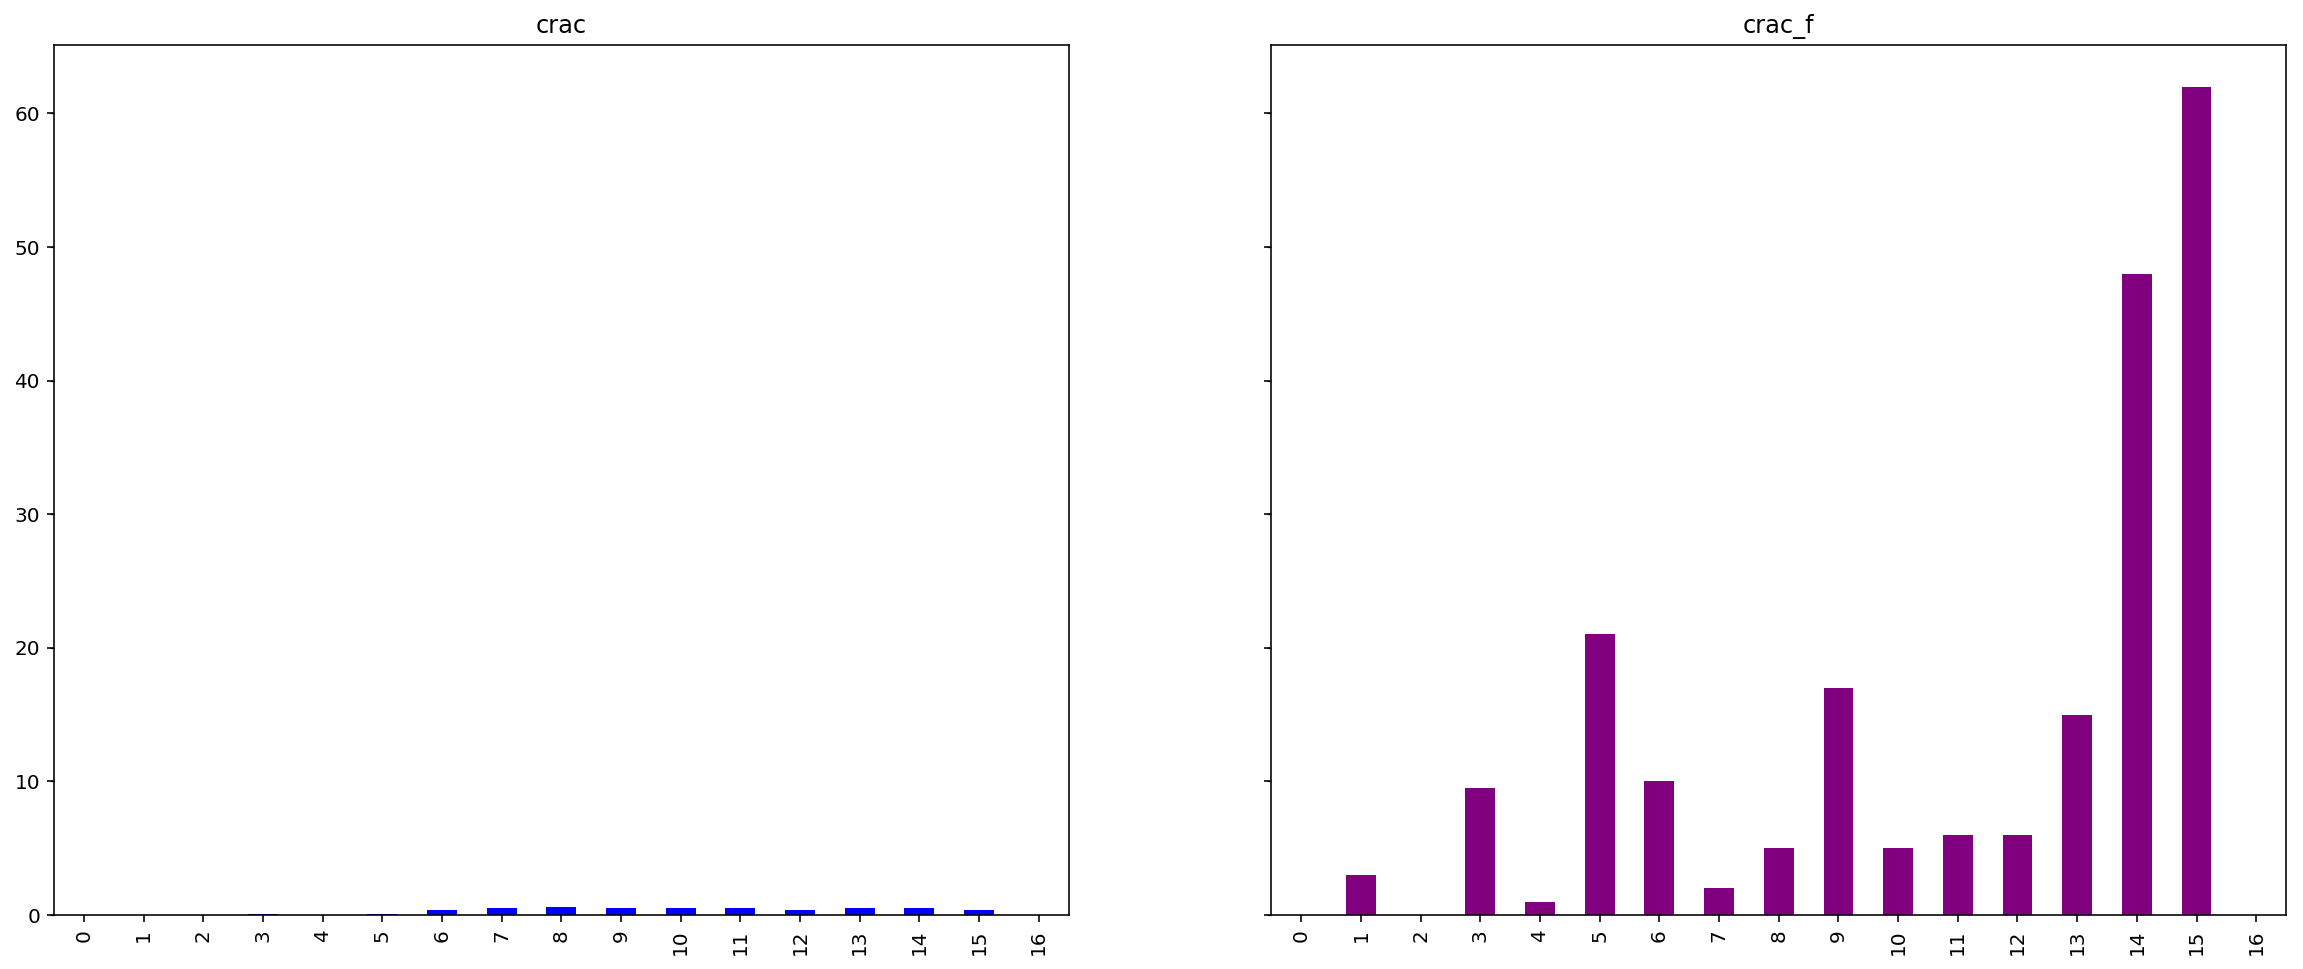

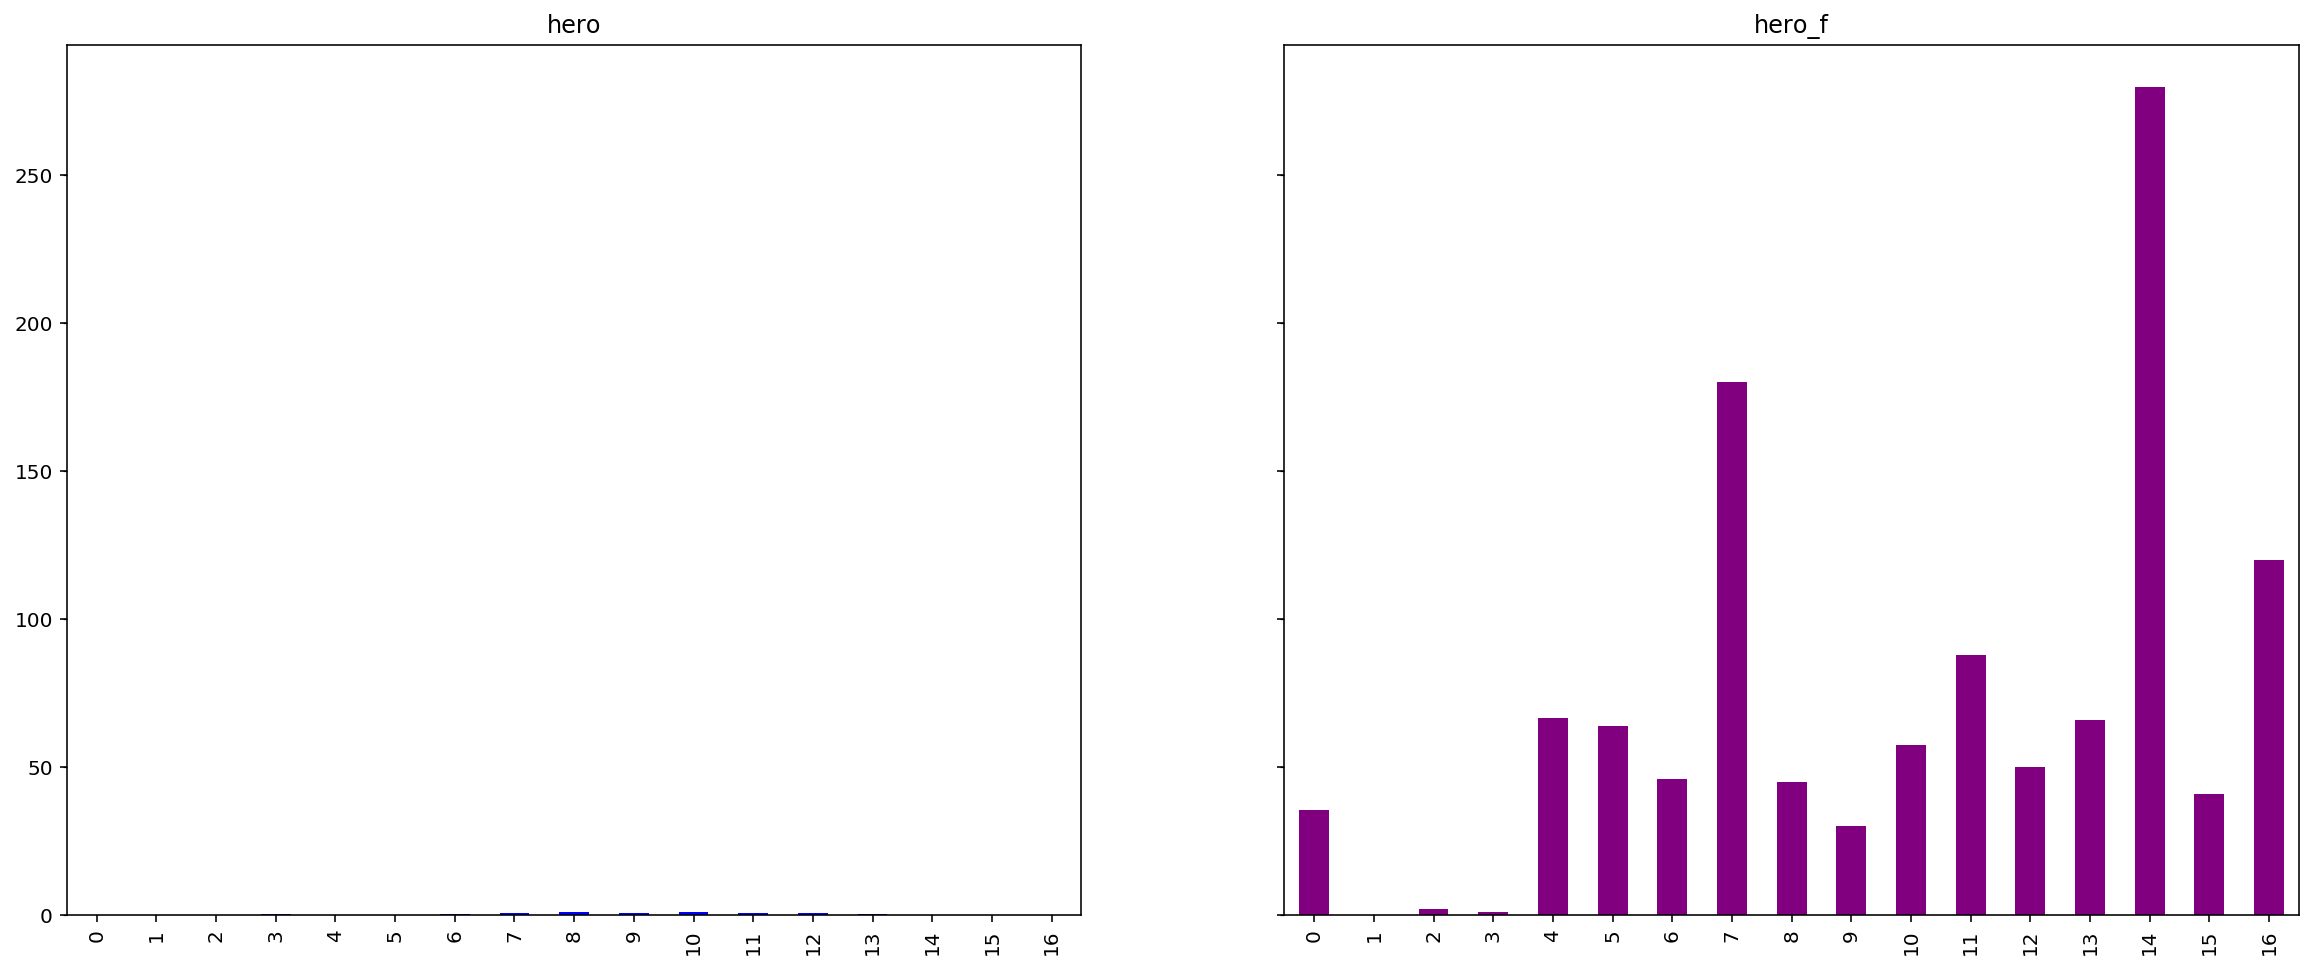

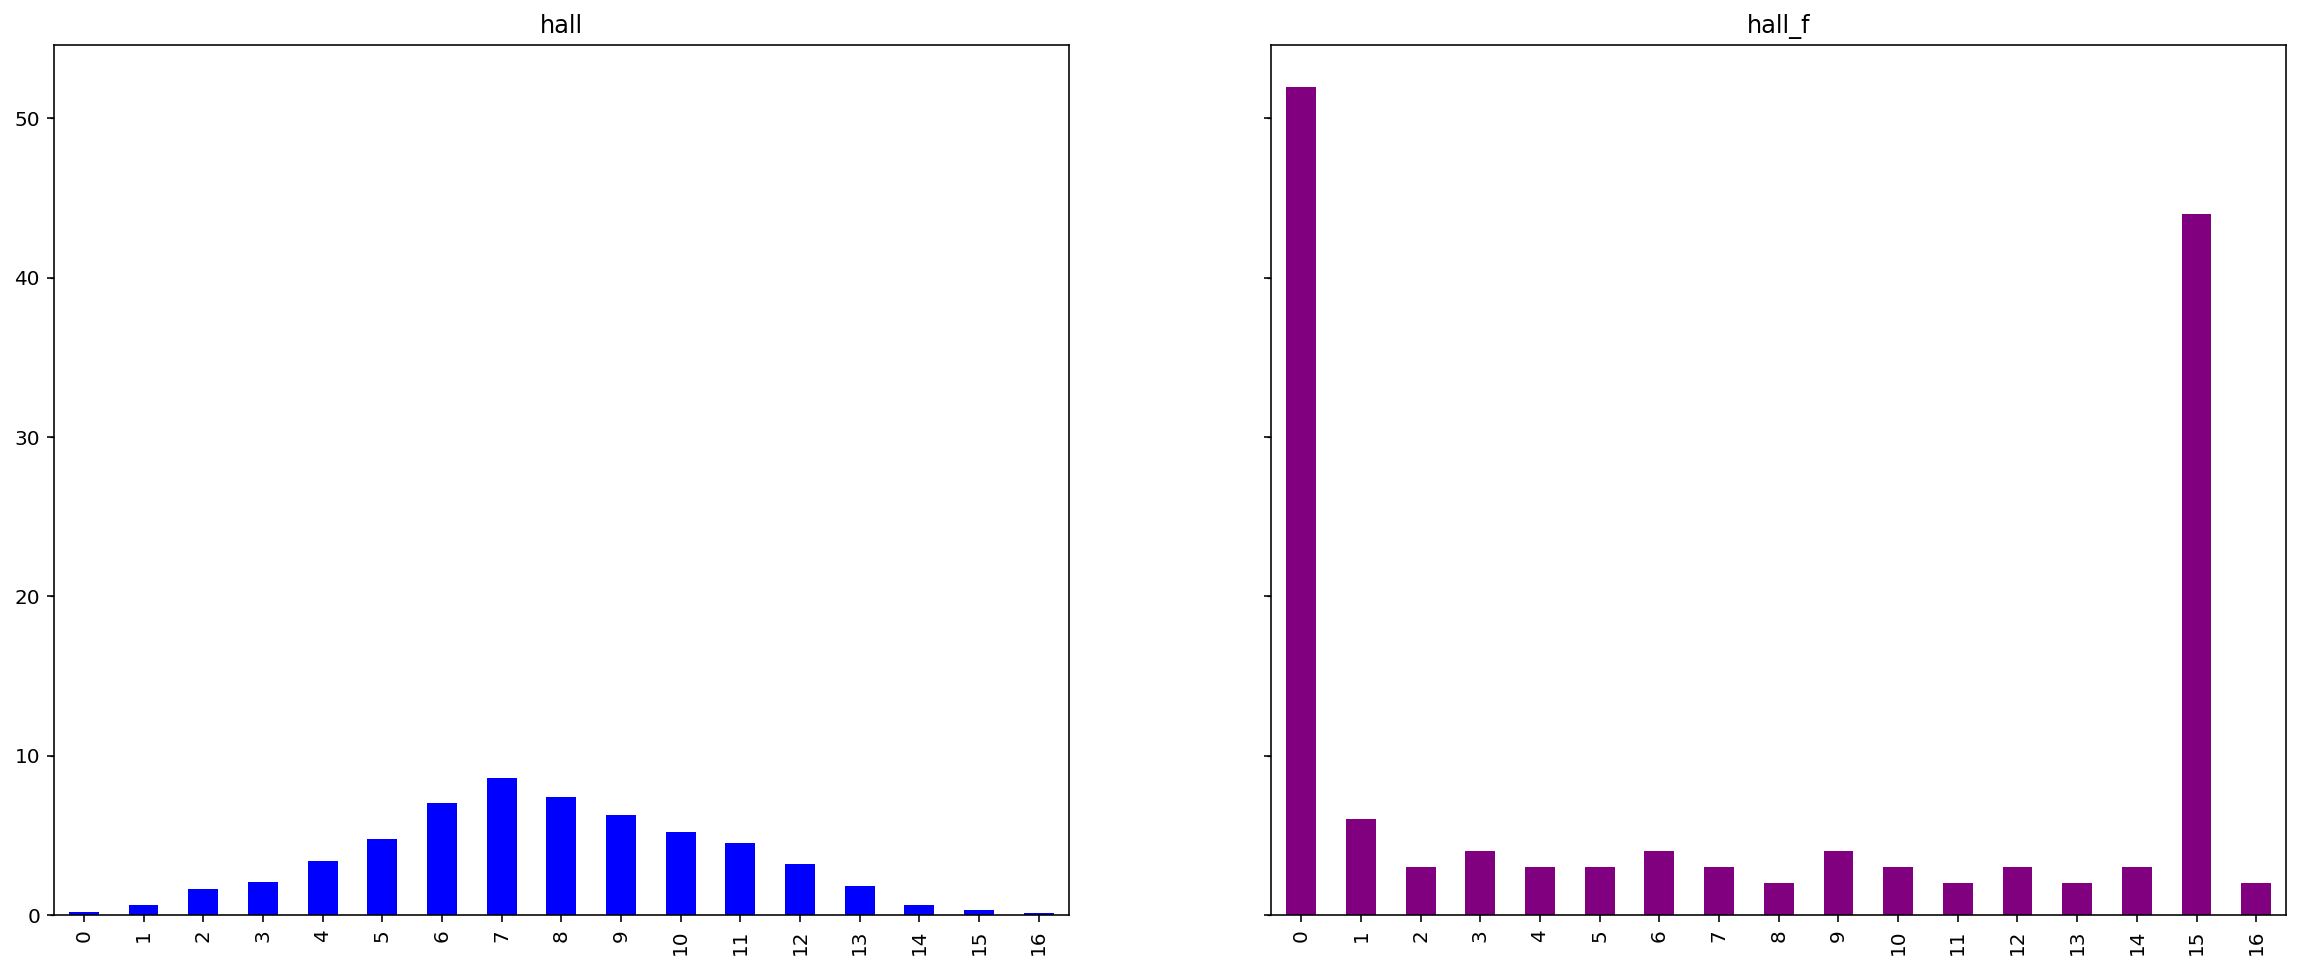

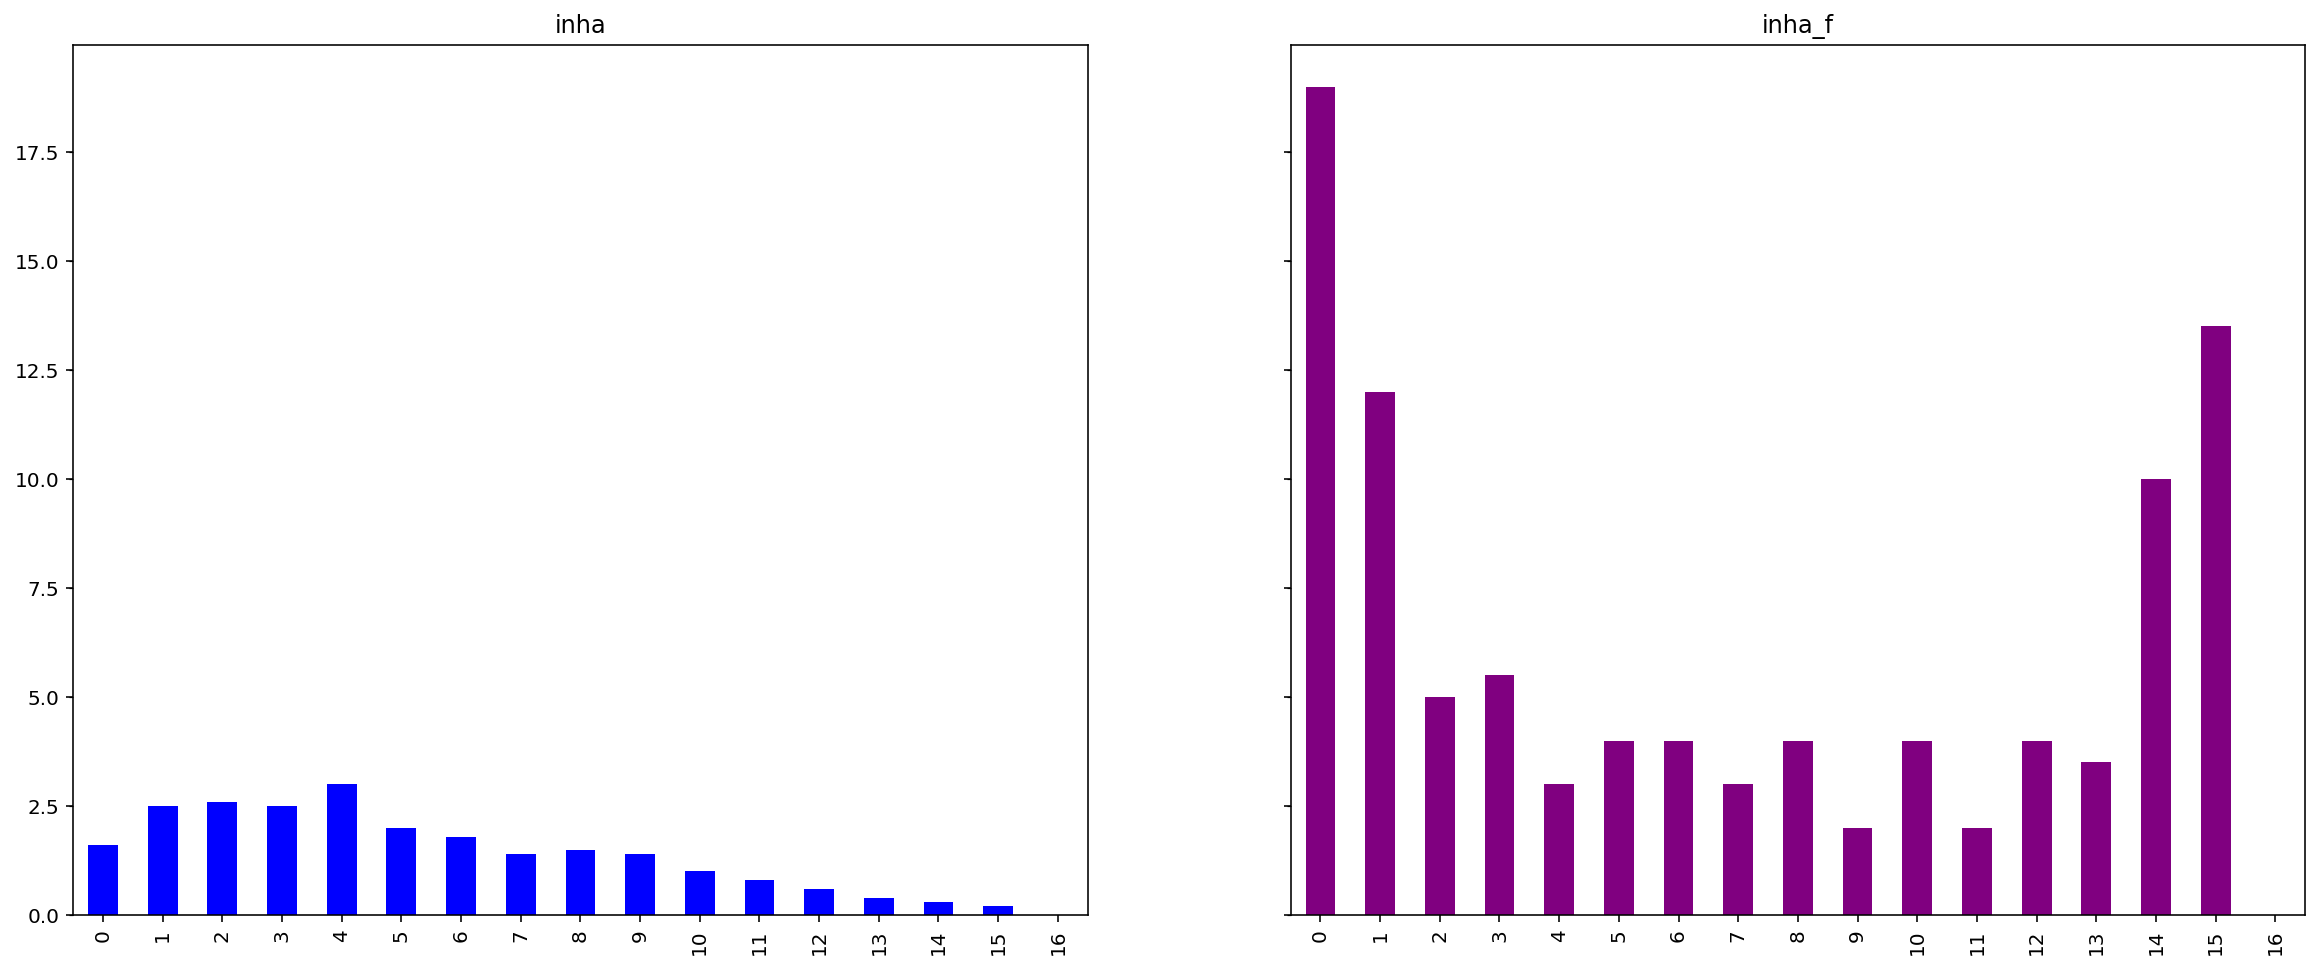

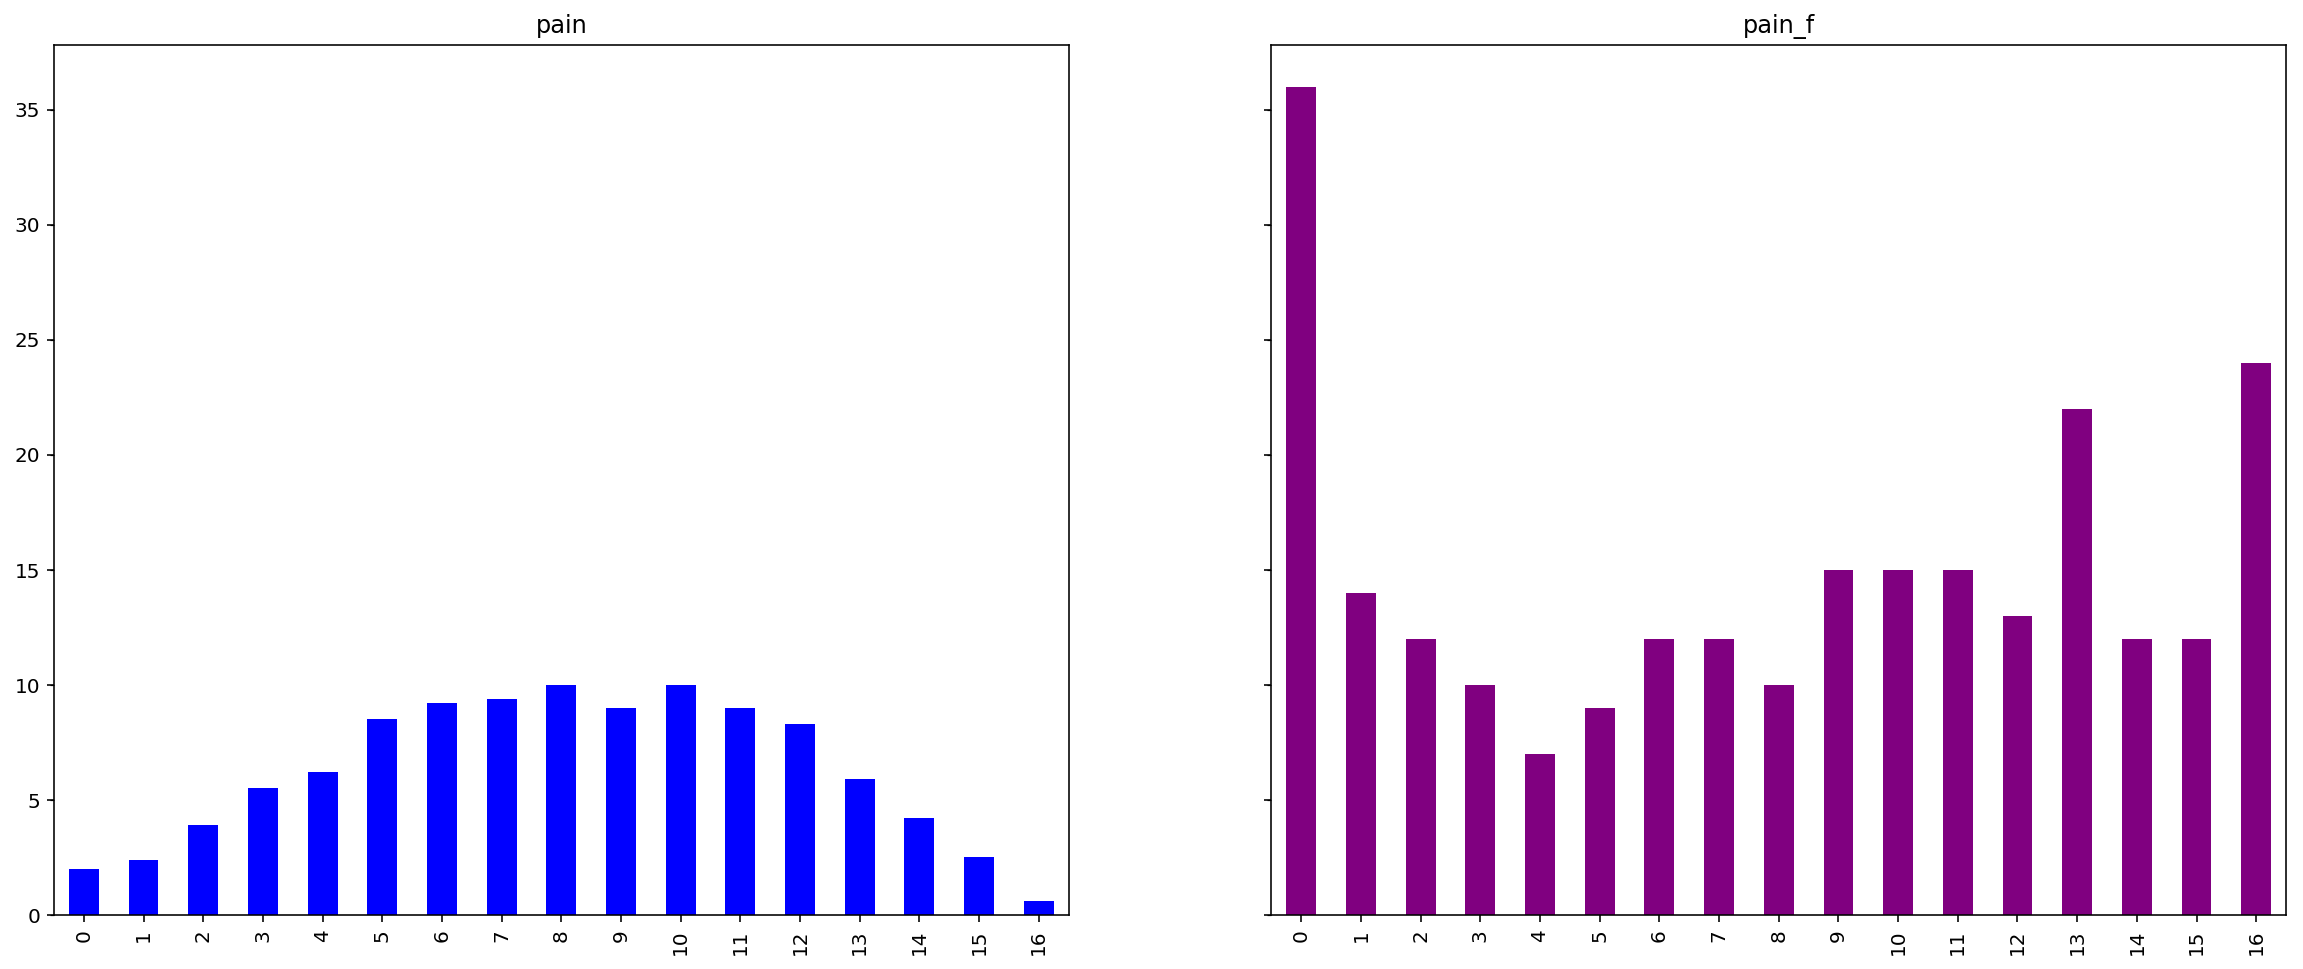

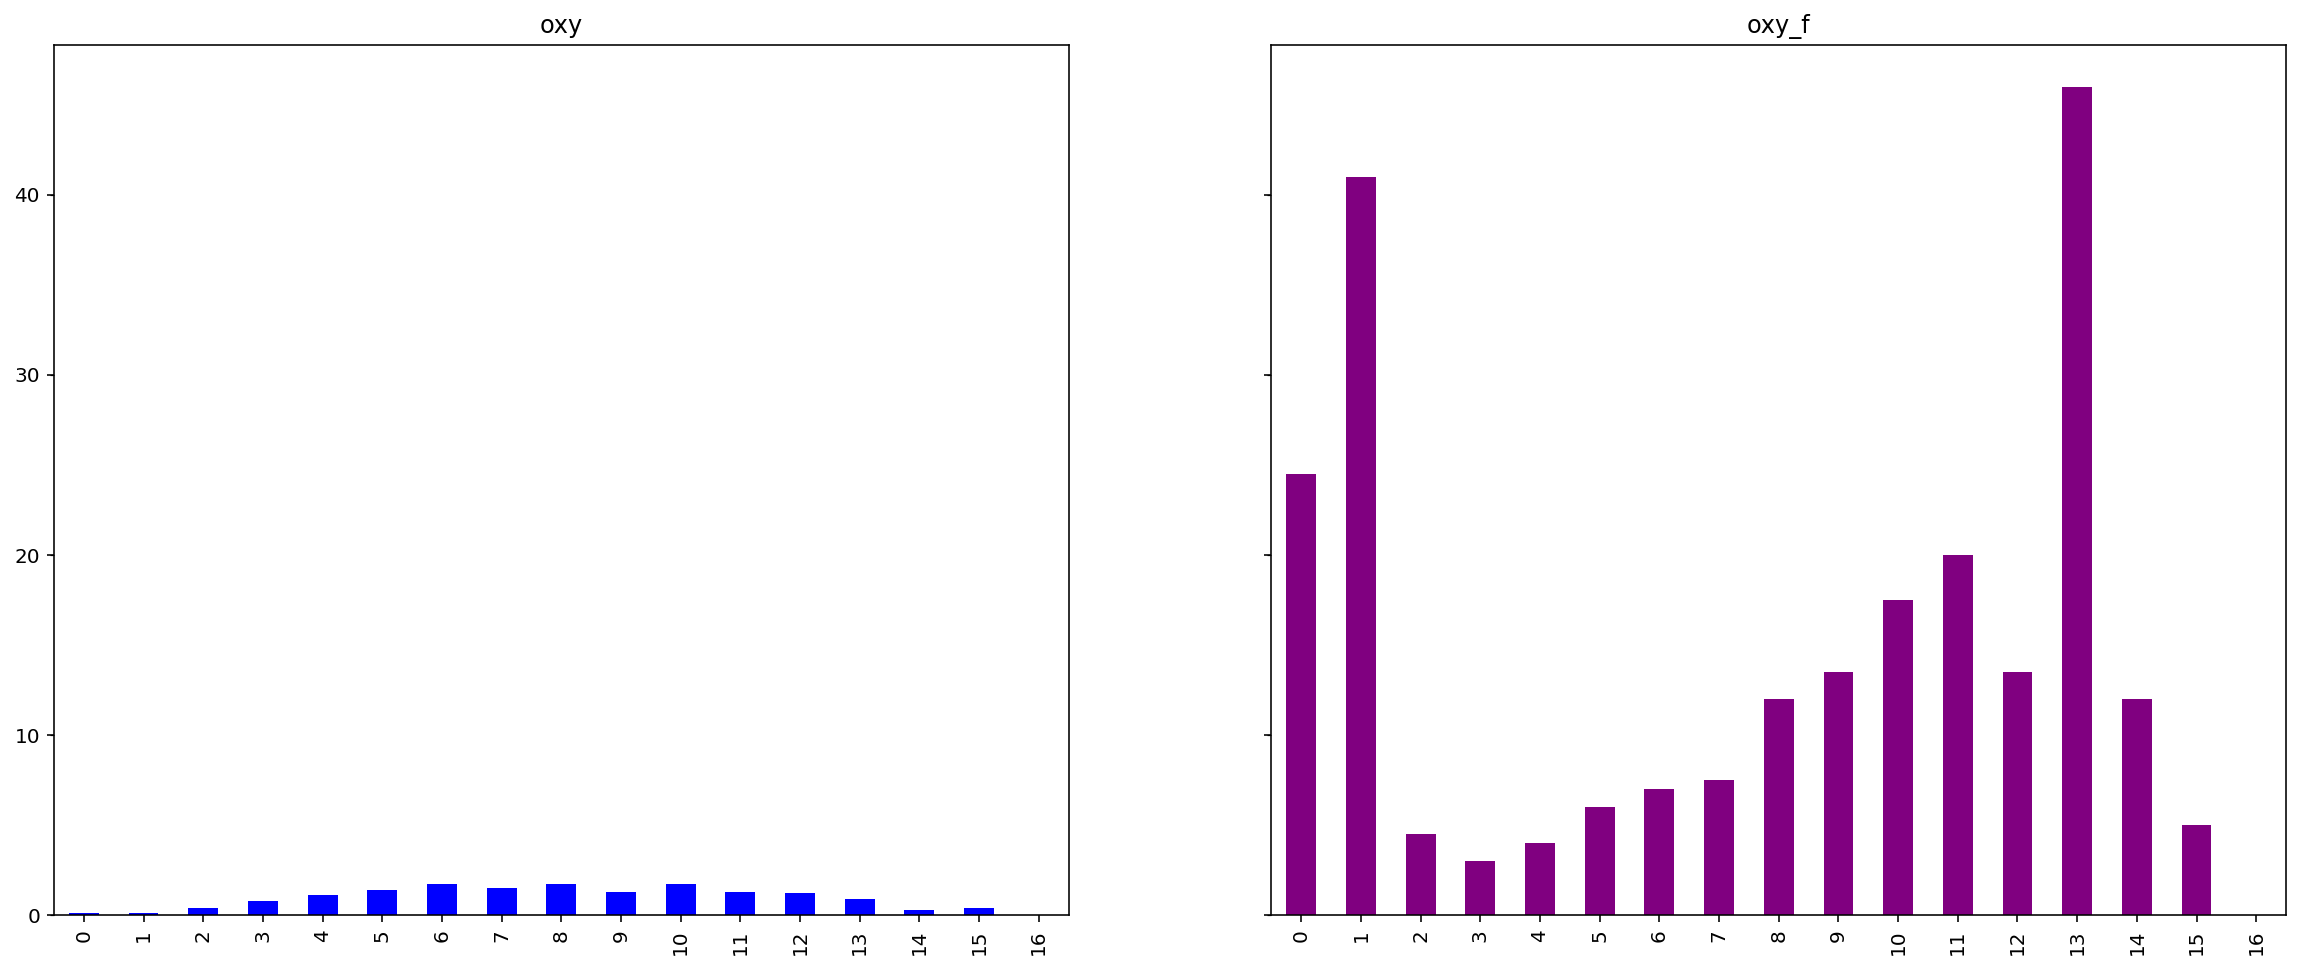

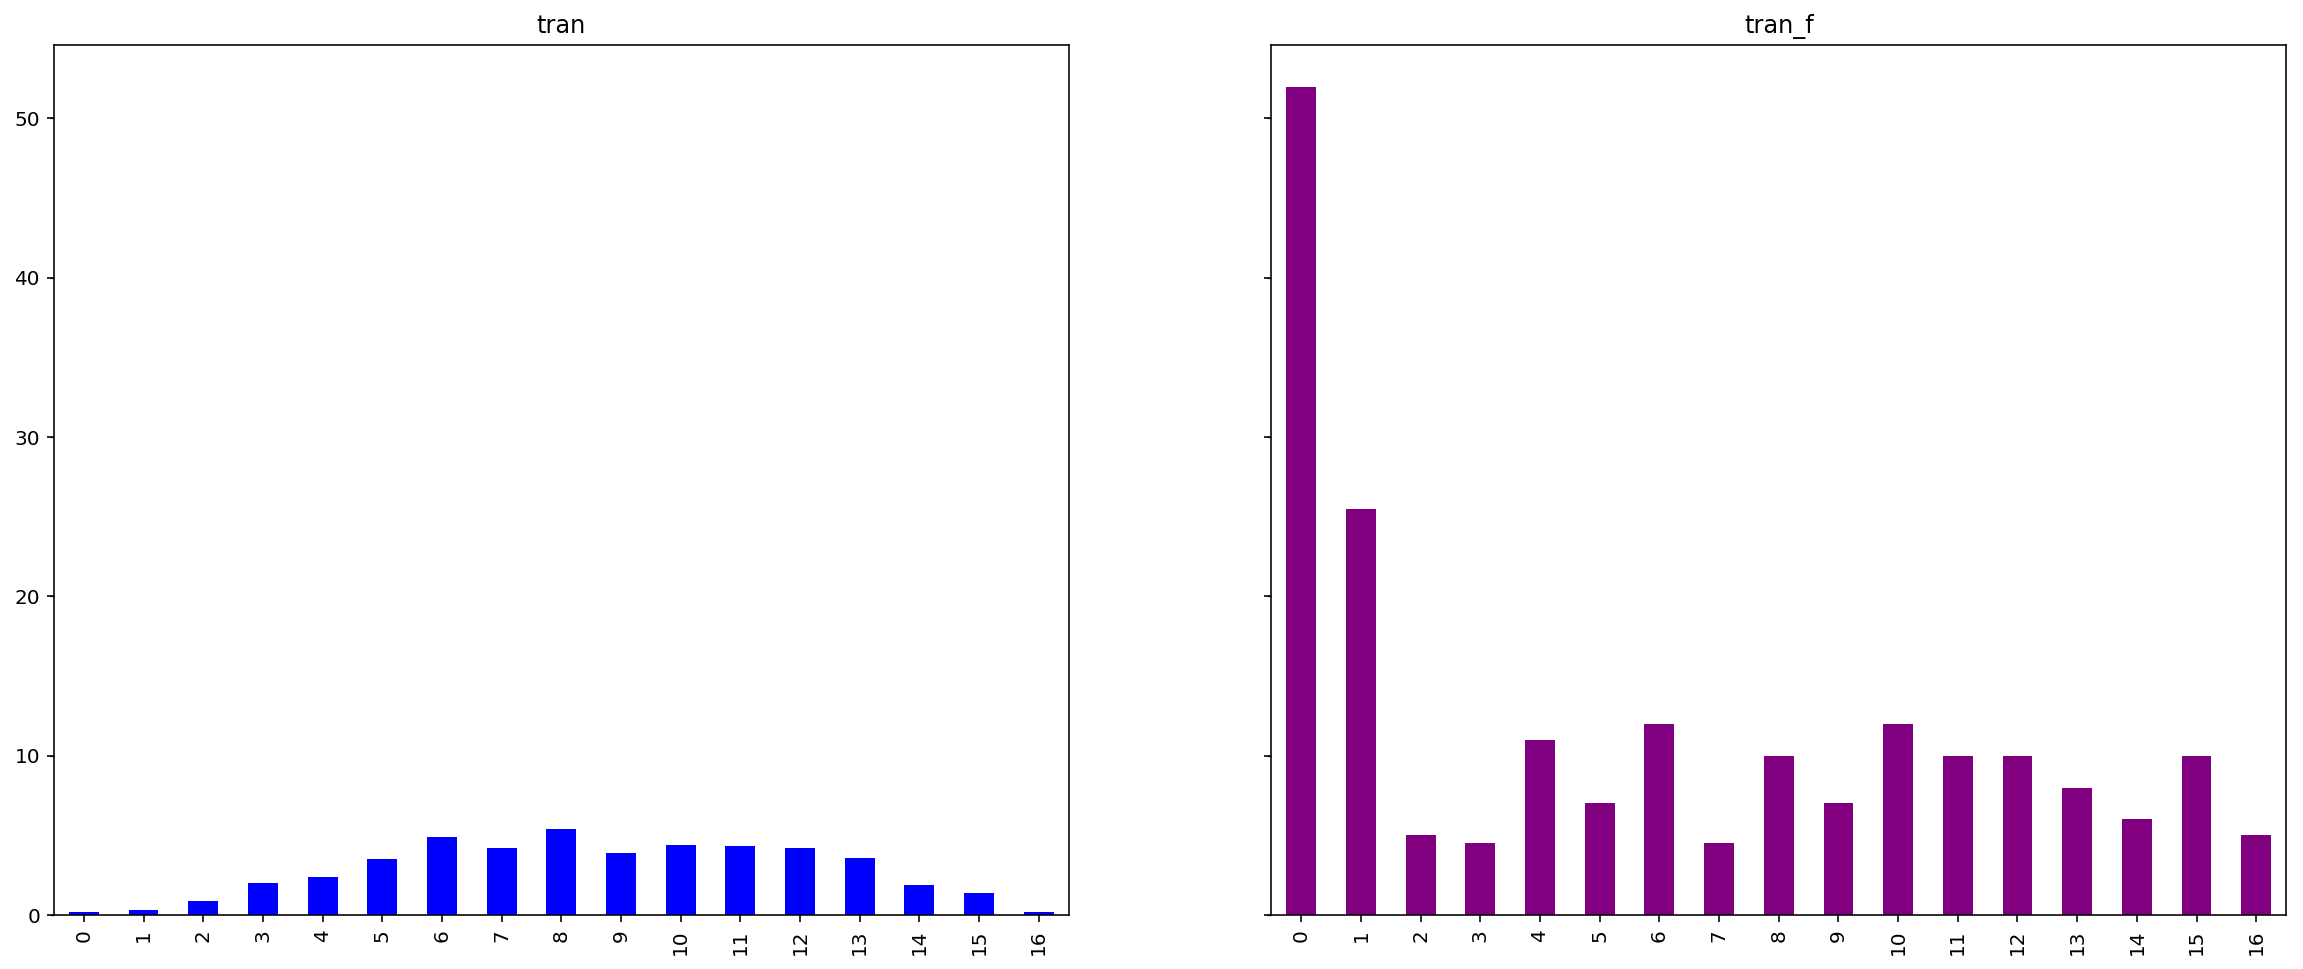

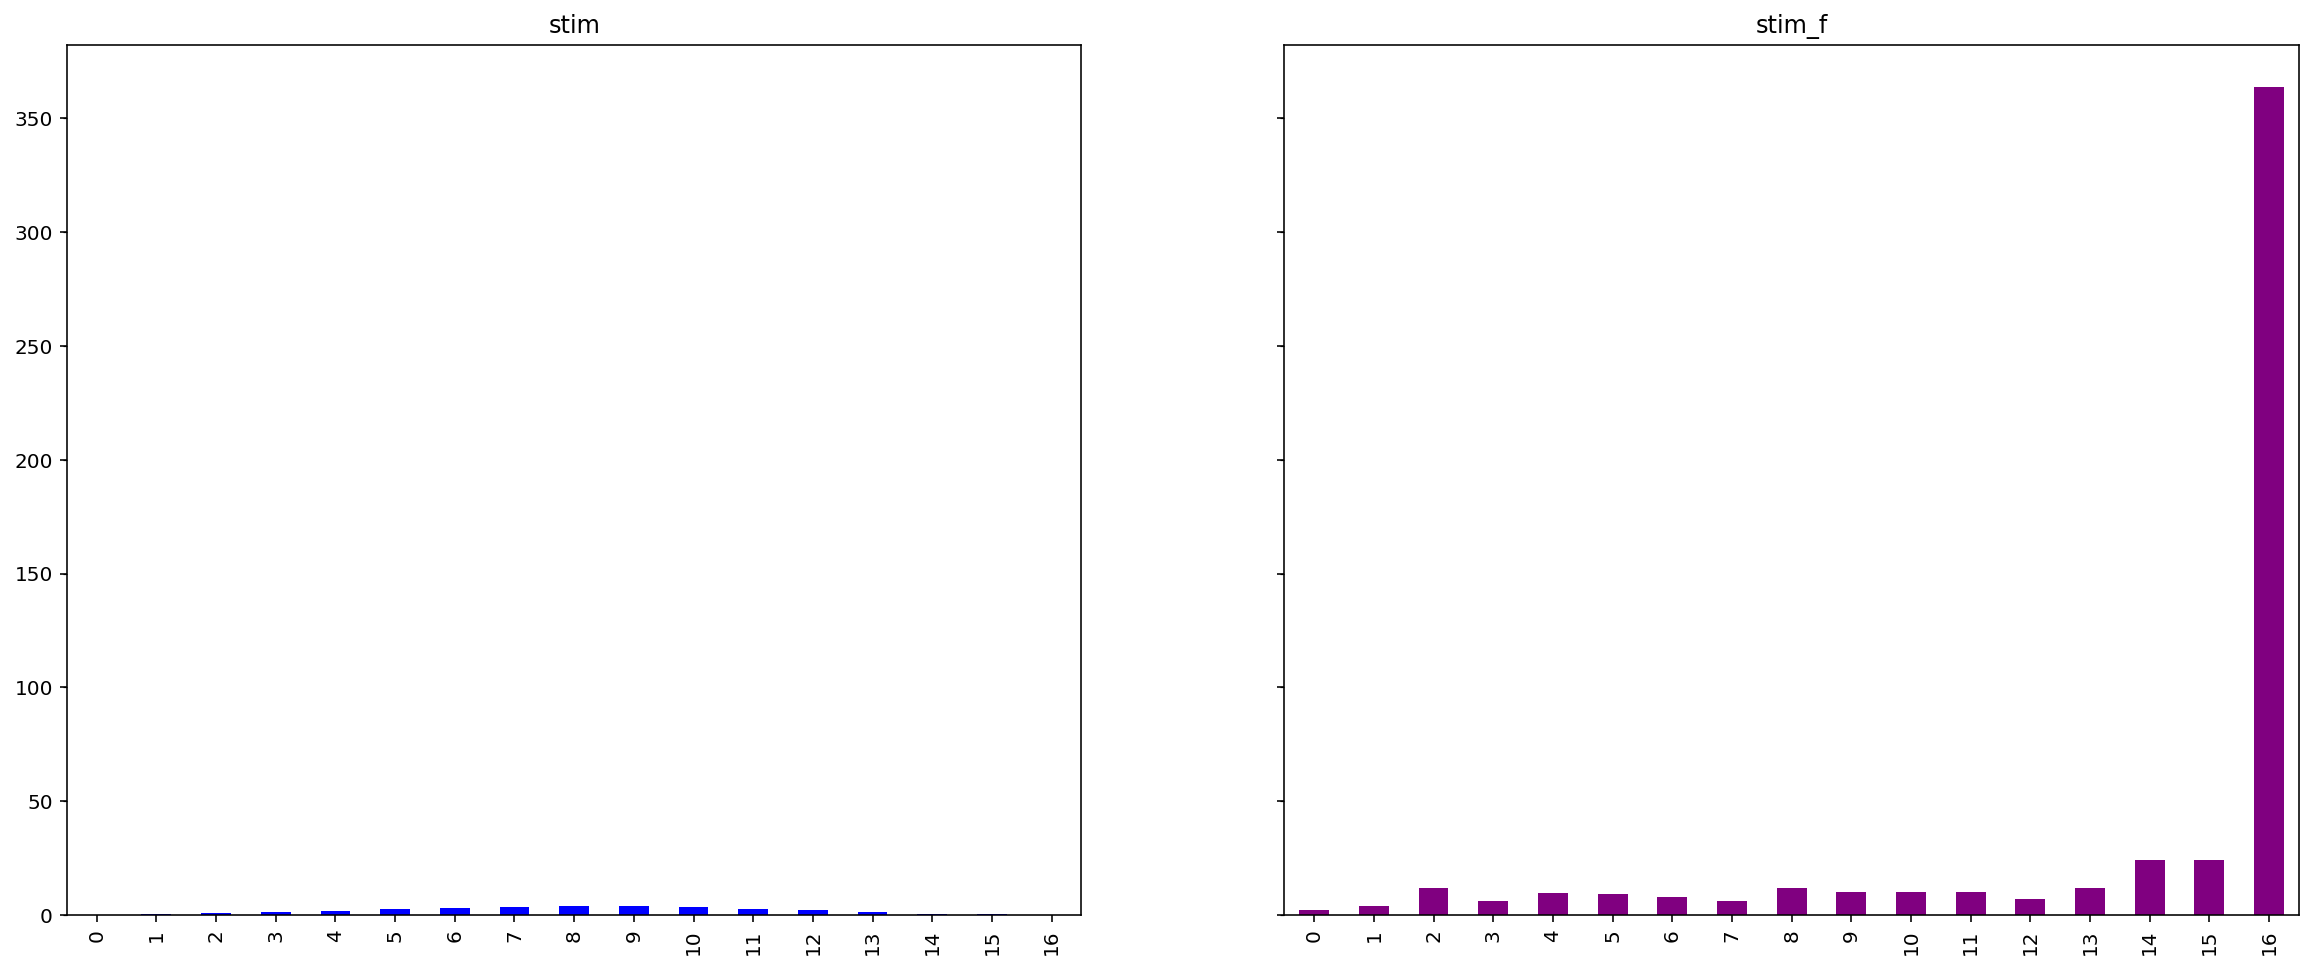

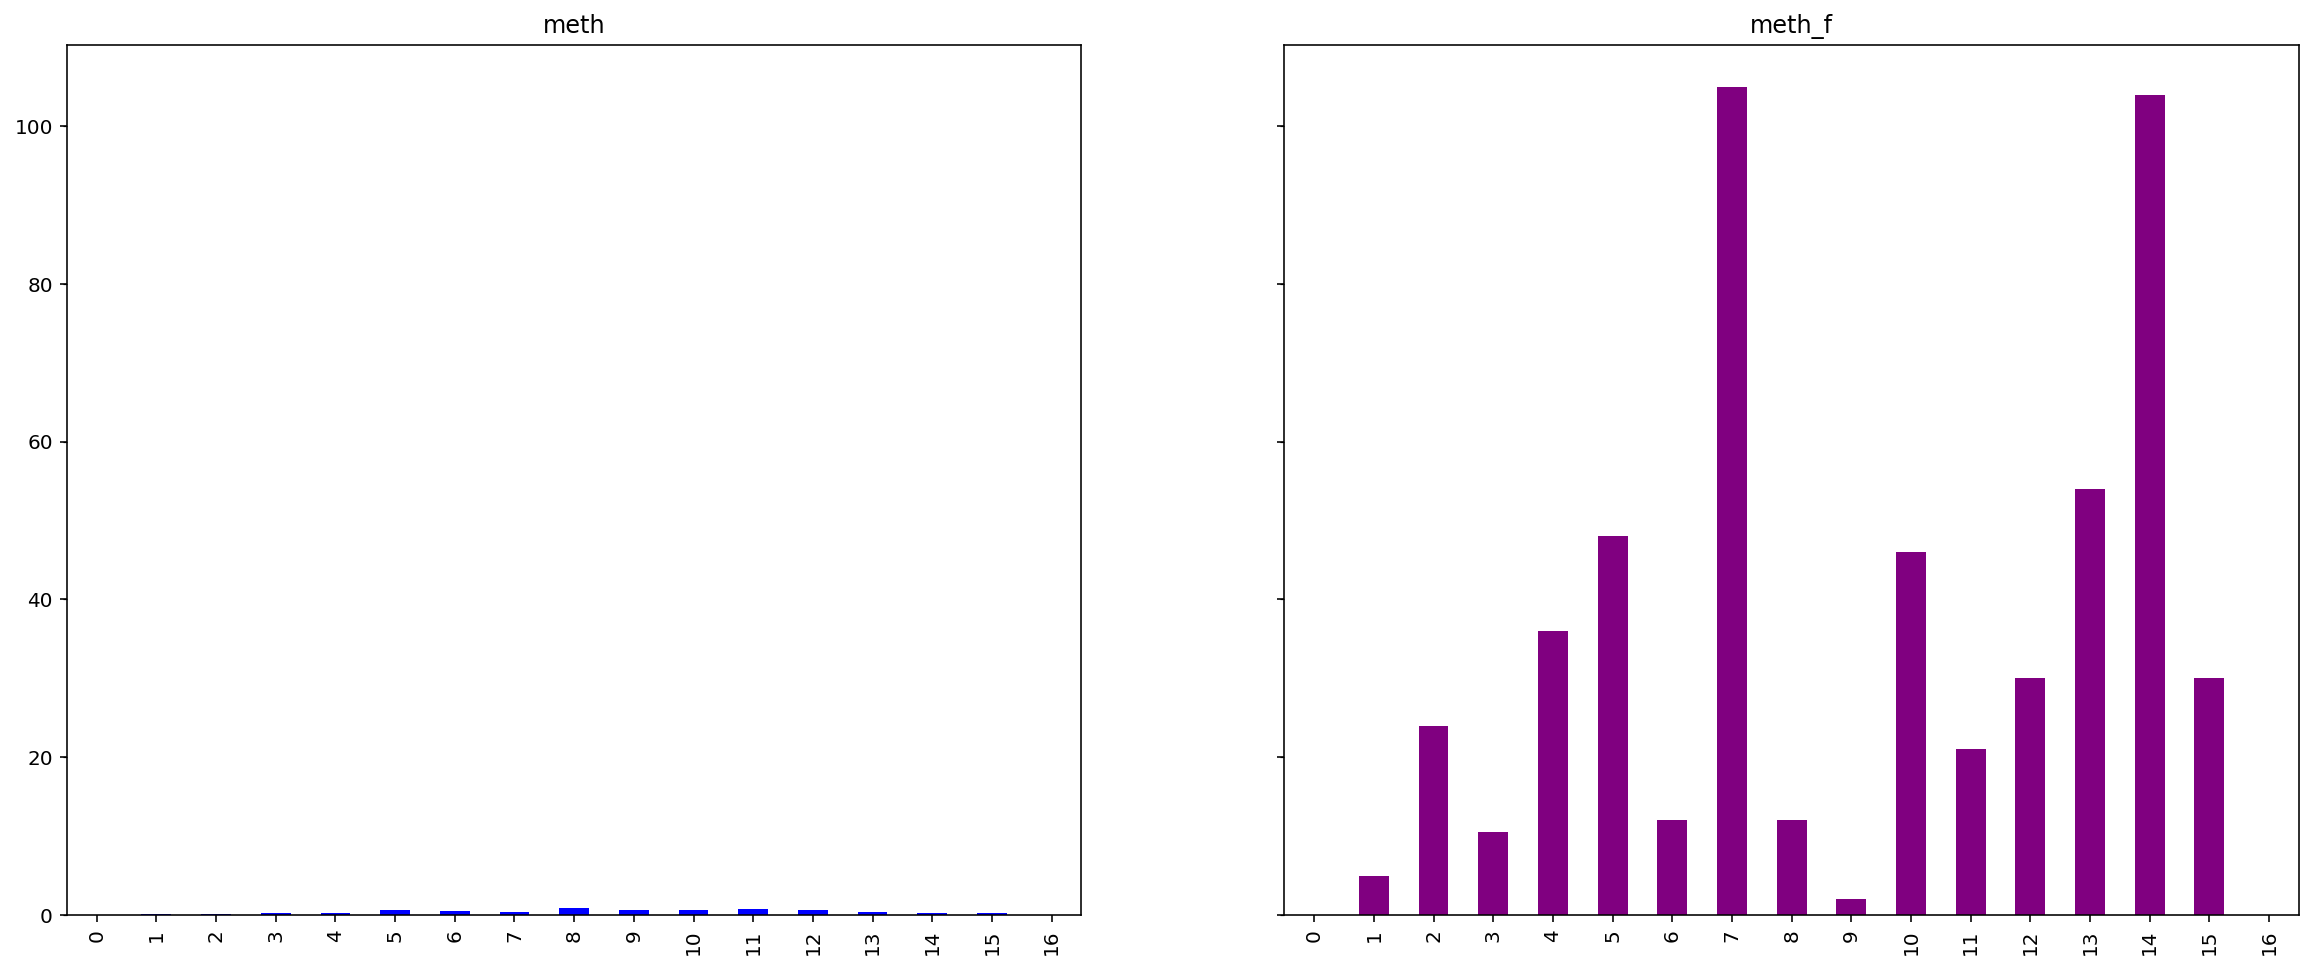

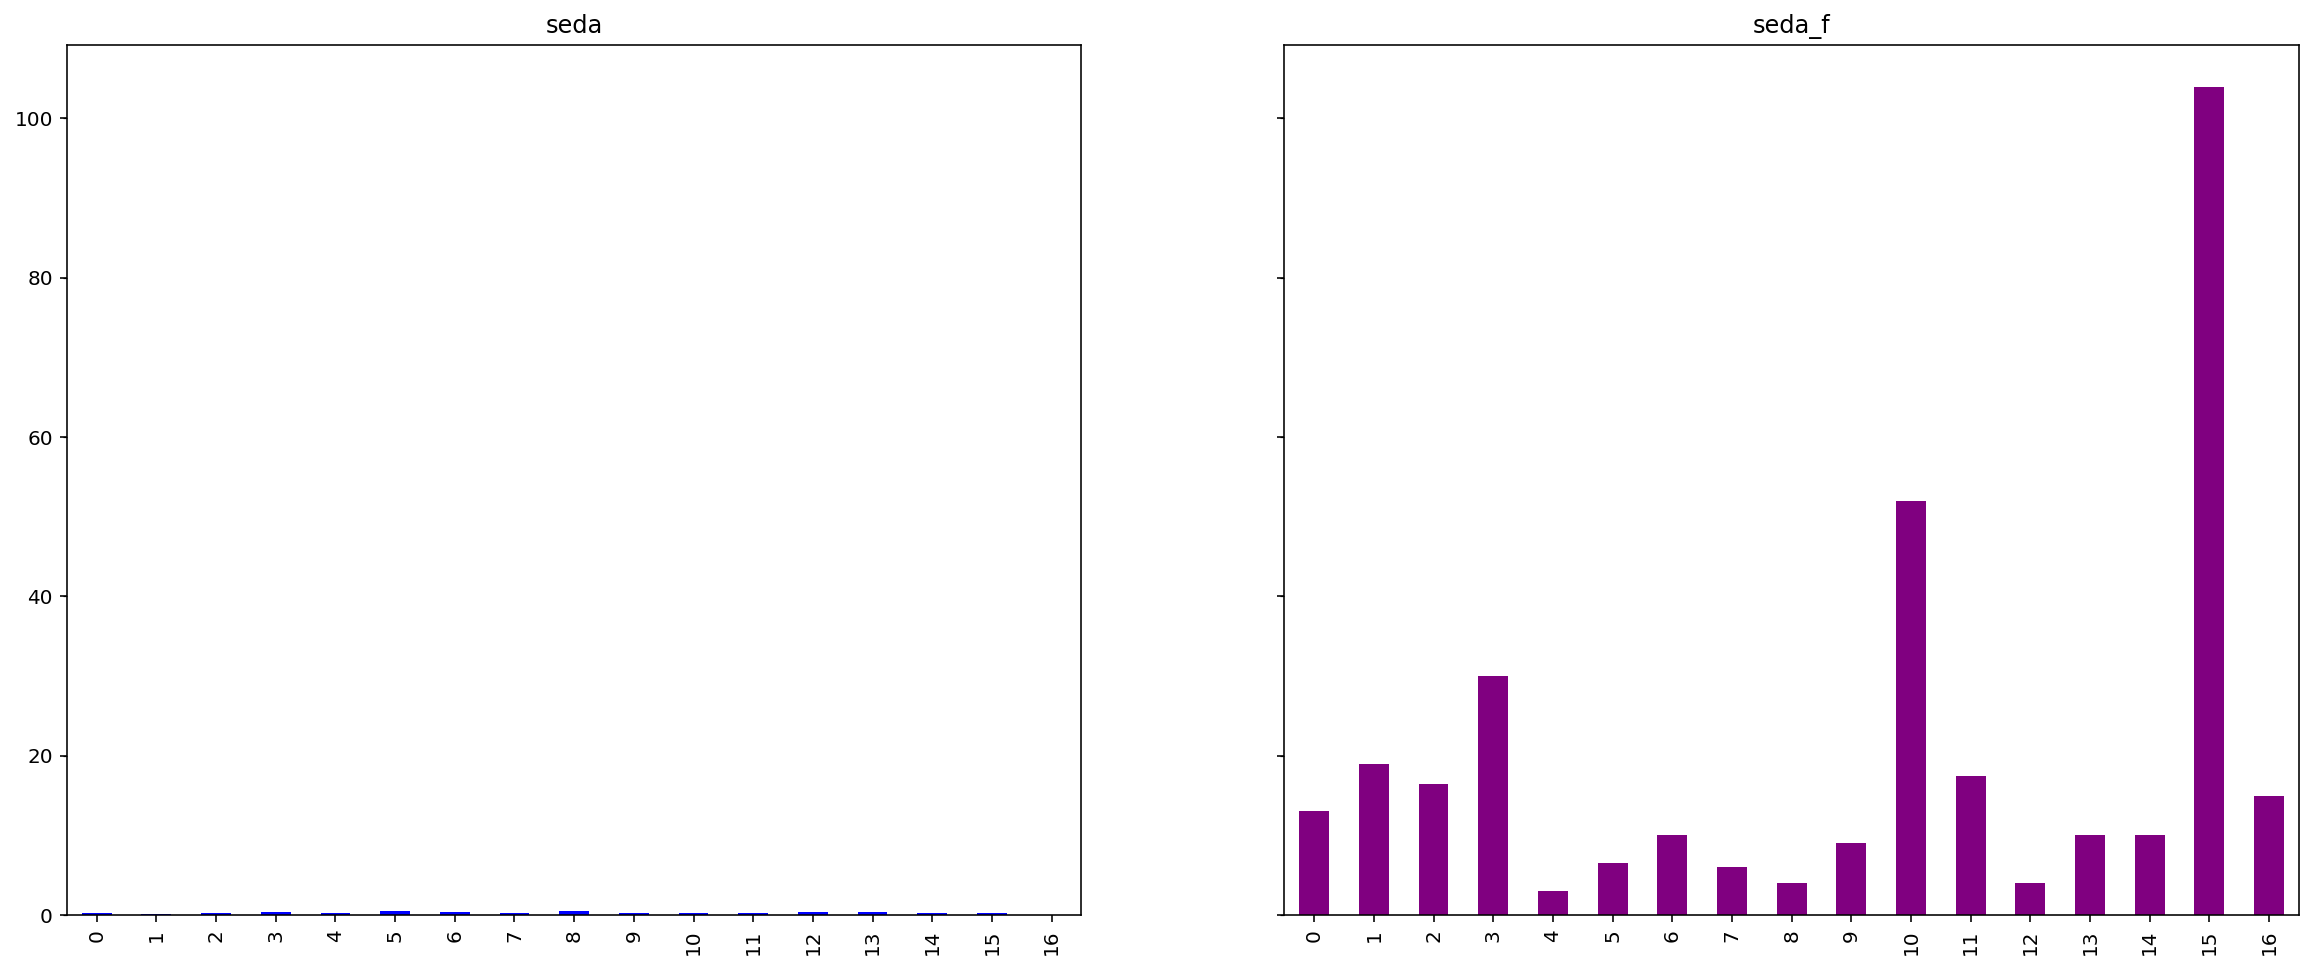

In [130]:
x=1
for n in range(len(drug_copy.columns)-14):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(20, 8))
    drug_copy[all_used.columns[x]].plot(x=drug['age'], y=all_used.columns[x], kind='bar',ax=ax1, color='blue',title=all_used.columns[x])
    drug_copy[all_freq.columns[x]].plot(x=drug['age'], y=all_freq.columns[x], kind='bar',ax=ax2, color='purple',title=all_freq.columns[x])
    x+=1

#####  Finally:   
    In conclusion, based on research, "needle" related drugs abuses by numbers appears to be high around the age groups between 18-23 age groups. Opiate pain-relievers abuse is among the highest and it's abuses spans across various different age groups.  Hallucinogen, cocaine and tranquilizer abuses are the next three in abuses numbers and percentage respectively. 
    
    In the sample, Oxycontin had been classified in its own group separately from pain-reliever group. In fact, they should  be grouped together under opiate pain-relievers. With both oxycontin and pain-relievers combined, actual pain-relievers addiction numbers would exactly be higher. 
    
    There is also a strong correlation between tranquilizer with oxycontin & pain-killers groups. The correlations are really high at 0.96 between oxycontin vs tranquilizer, where oxycontin group is 0.98 with painkiller group. It is likely because tranquilizer has the similar effects. 
    
    Heroin is the drug that has the highest frequency of repeated abuse. Even though heroin addiction is not that high in    term of numbers, but that group of users tend to abuse it repeatingly. This seems to imply that heroin is the most addictive drug with most needles been used. Meth-use is next in line. Hence we should also monitor both of these 2 drugs-groups,  with a particular attention for age-groups of "19" and "35-39".

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

#### ** Question and deliverables**

    Although alcohol and marijuana are 2 most commonly abused substance, it is NOT in line with our mayor project of "Move the needle". So now we investigate the next "highly" abuse substance "painkiller / pain-reliever" group. Both painkiller and oxycontin can be administered through needles. 

    As such, I am very keen in the relationship between how frequent users abuse painkillers and users abuse oxycontin in this sample.  

#### Is Oxycontin users frequency the same as Pain-reliever?    
    H0:  oxycontin_frequency is the same as pain_reliever_frequency 
    H1:  oxycontin_frequency is not the same as pain_reliever_frequency

In [56]:
hypo_df = drug_copy[['pain_f','oxy_f']]

In [57]:
print(hypo_df['pain_f'].mean())
print(hypo_df['oxy_f'].mean())
print(hypo_df['pain_f'].mean() -  hypo_df['oxy_f'].mean())     # find difference between 2 samples mean

14.705882352941176
14.8125
-0.10661764705882426


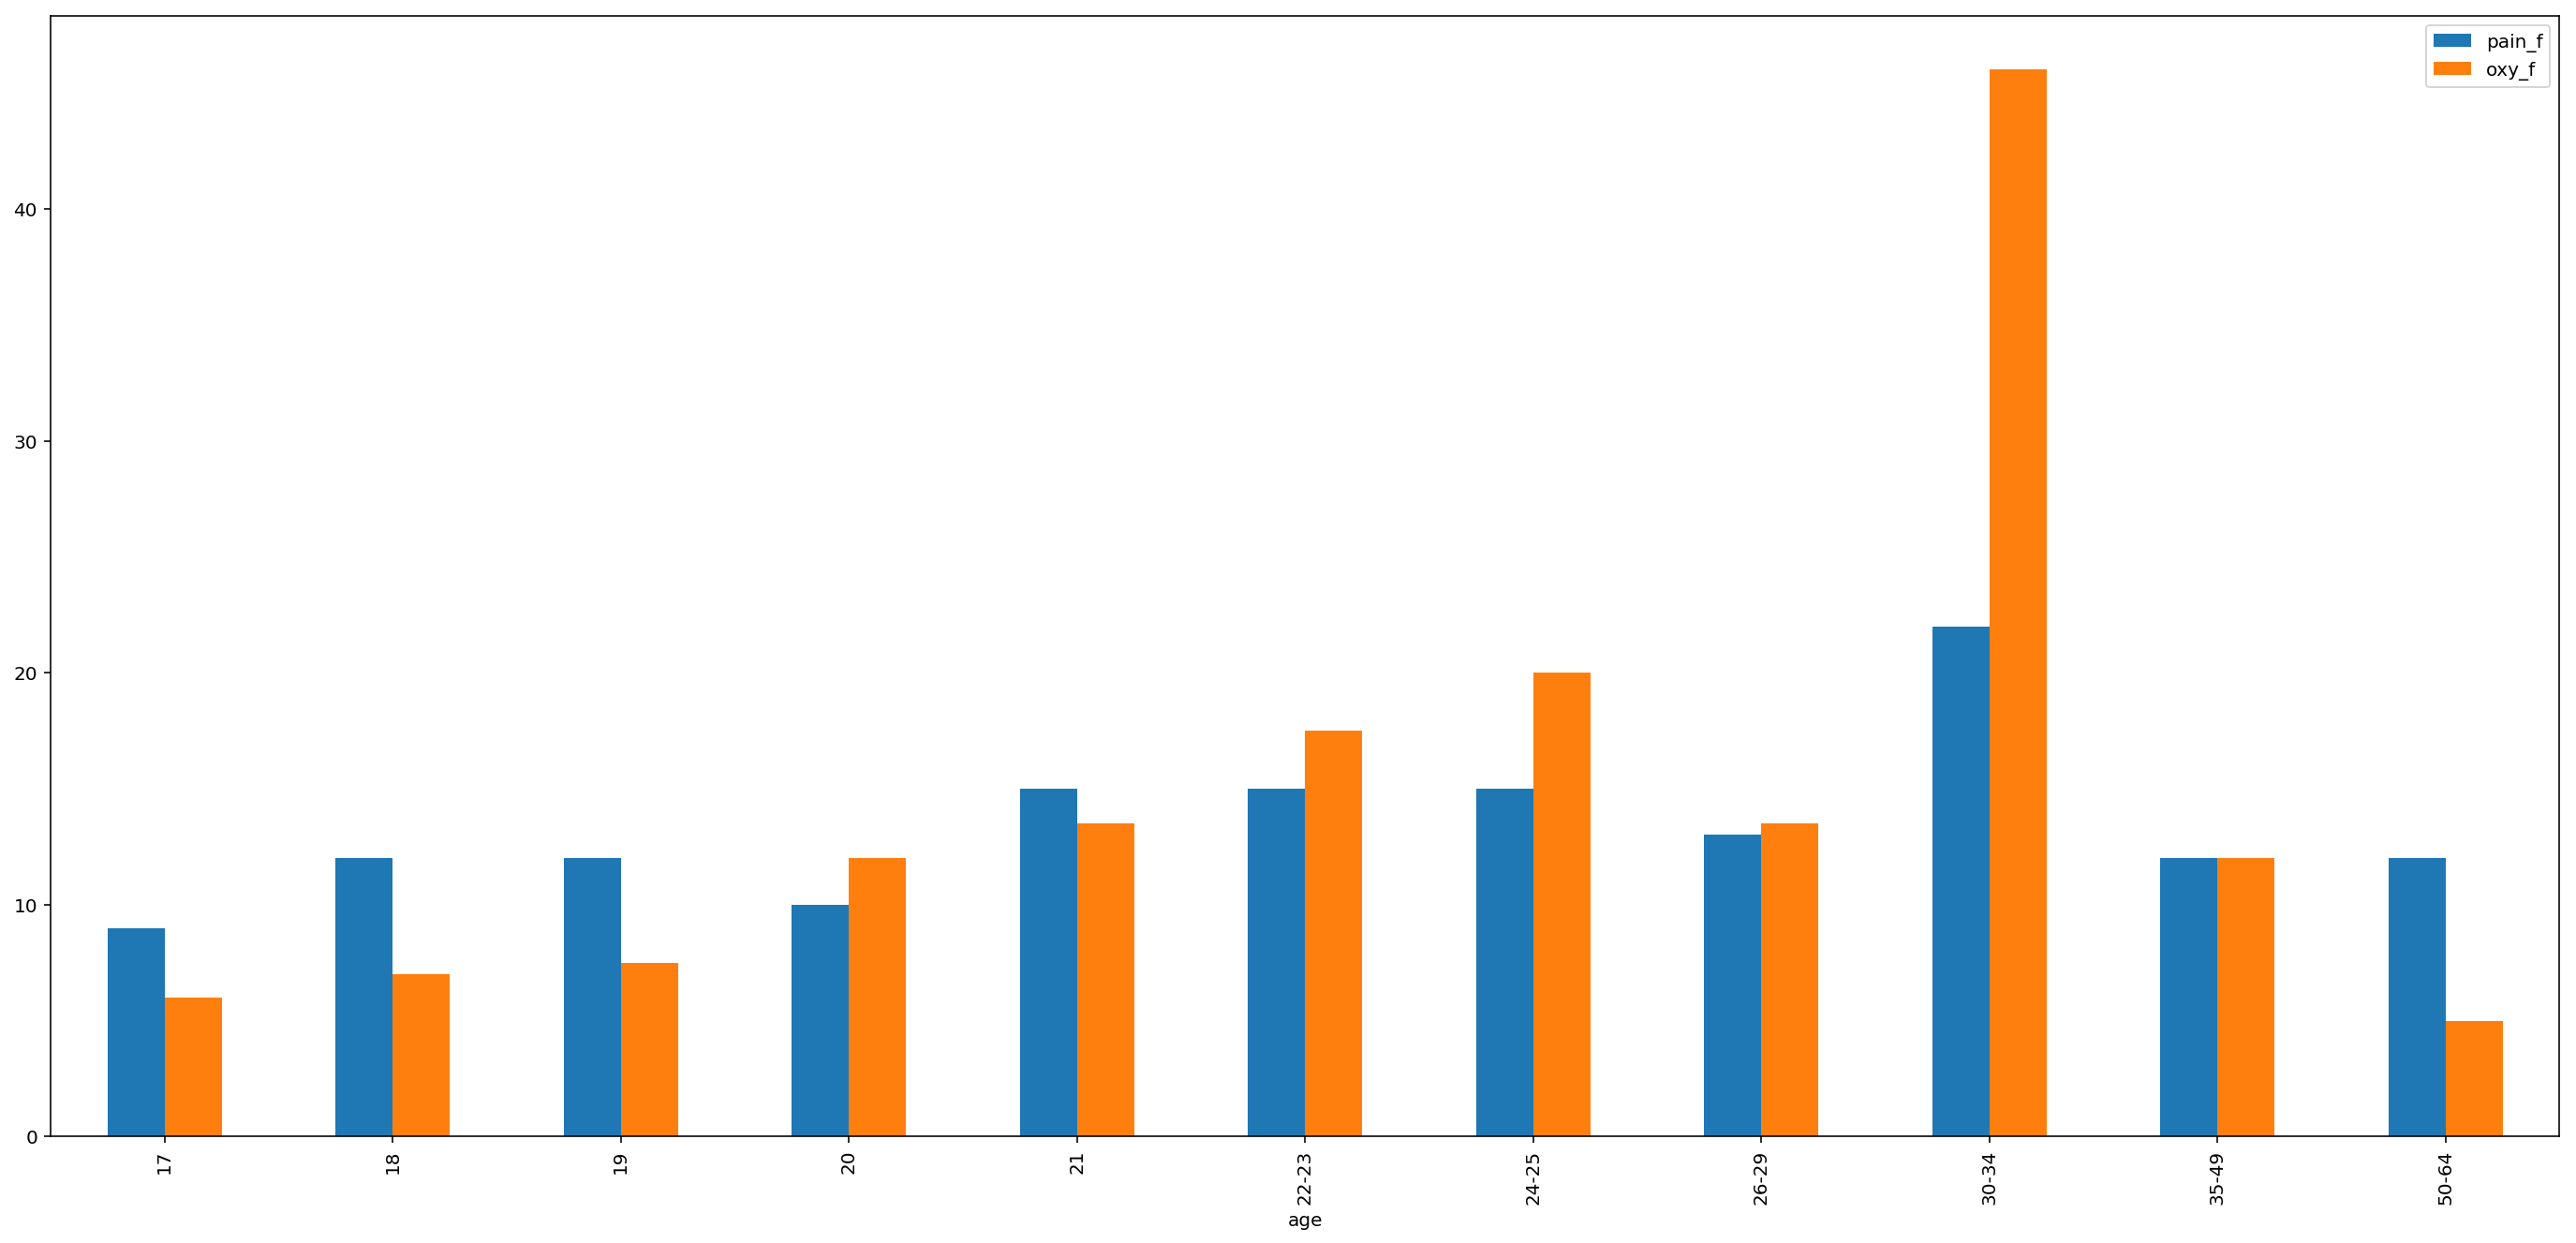

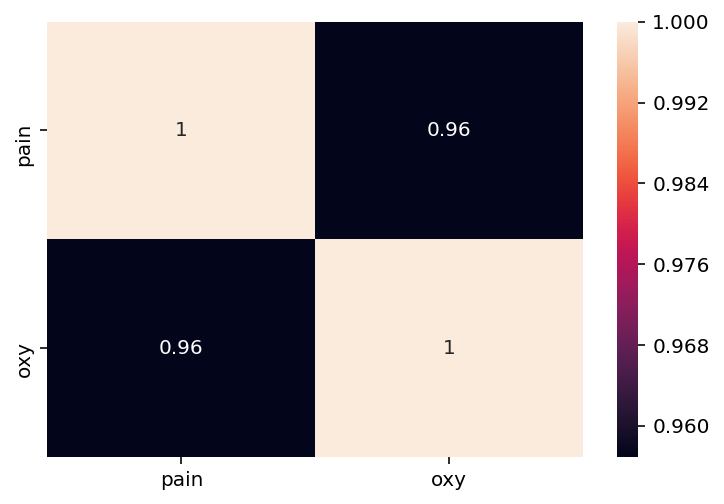

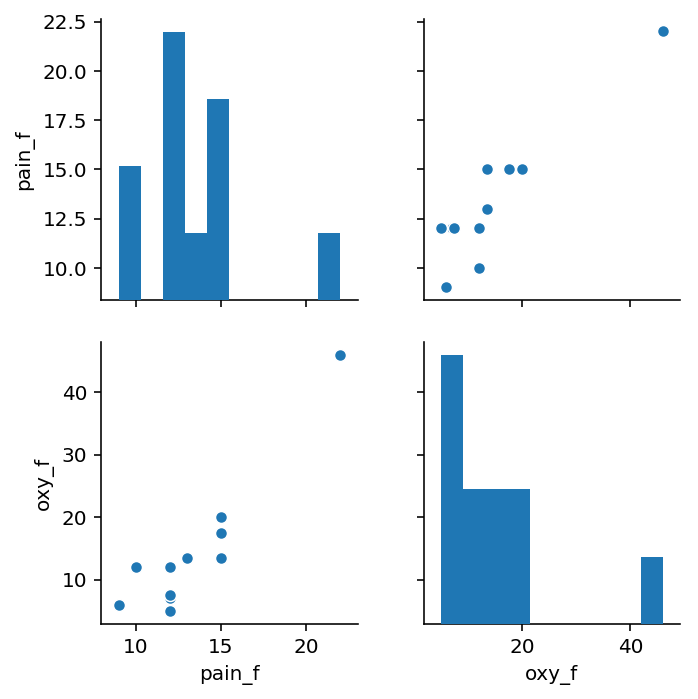

In [58]:
# Take a look at the frequency of abuse between oxycontin vs other opiate class of strong pain-relievers.
opiate_freq = drug[['age','pain_f','oxy_f']] 
opiate_freq.plot(x='age', kind='bar',figsize=(24, 11))
opiate_use = drug[['age','pain','oxy']] 
plt.figure(figsize=(6,4))
sns.heatmap(opiate_use.corr(), annot=True)
sns.pairplot(opiate_freq)

In [59]:
stats.ttest_ind(hypo_df['pain_f'], hypo_df['oxy_f'].iloc[:16])

Ttest_indResult(statistic=-0.030003630957118617, pvalue=0.9762564938195877)

***Report**

***Hypothesis outcome:*** 
    
    As p-value is at the value of 0.976, I therefore unable to reject the null  hypothesis (H0). In addition our correlation coefficient of 0.95695 shows really strong positive correlation. Hence, we can conclude that oxycontin users frequency is the same as painkiller users frequency. It is highly likely that they are same group of users who abuse both of these drugs groups. 


***Analysis outcome:*** 

    With my analysis research on opiate-painkillers across all age-groups, oxycontin abuse frequency remains consistently higher than other painkillers. It is exceptionally high for the age group "30-34". It could be probably because this group has "easier" access to oxycontin. E.g. chronic backpain, accute migraine complaints by "mid-age" adult is more "believeable" to a doctor than a teenager who complained the similar. 
    
    Recommendation to Mayor: To monitor across various age group for oxycontin and other pain-relievers abuse especially the range from 20 to 34 years old; for his move the needle project. At the same time, we should not forget that needle usage are high among heroin users as well as meth users.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [60]:
sat_exclude_rate = sat[['State','Verbal','Math']]

C:\Users\Vincent\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


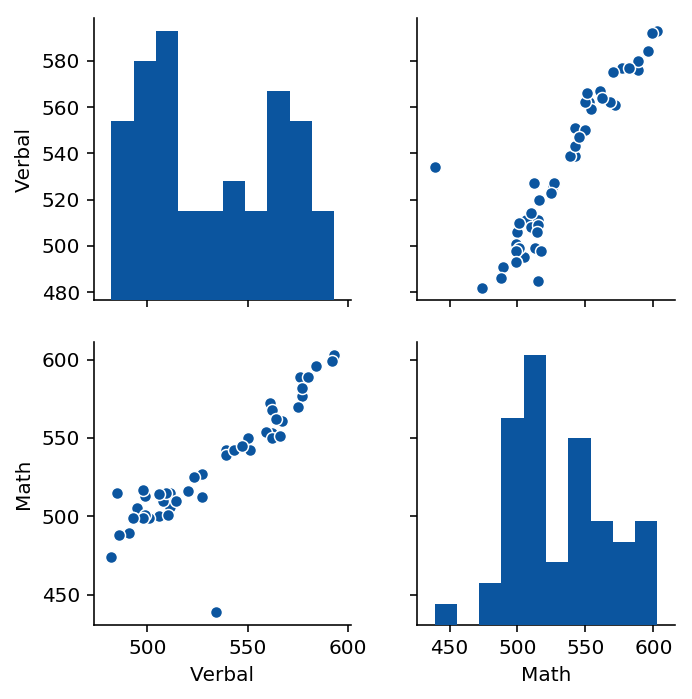

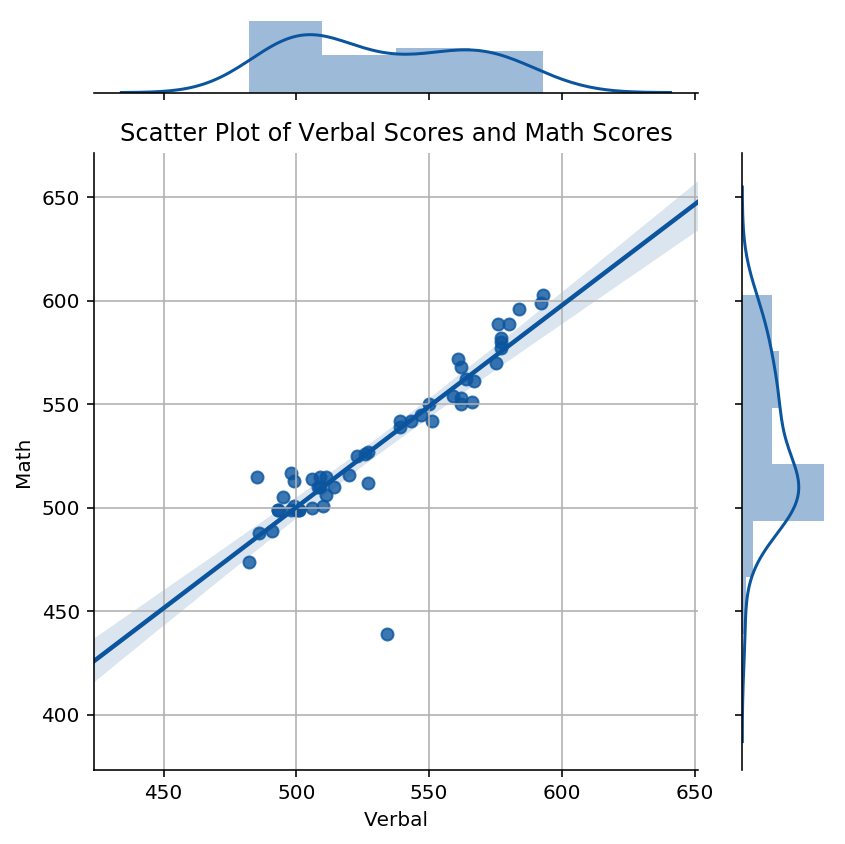

In [61]:
sns.set_palette("Blues_r")
sns.pairplot(sat_exclude_rate)

sns.jointplot("Verbal","Math",data=sat_exclude_rate,kind="reg")
ax=plt.gca()
ax.set_title("Scatter Plot of Verbal Scores and Math Scores")
ax.grid(True)
plt.tight_layout()
plt.show()

    #  From the above plots, there appears to be one outlier where verbal is around 525 to 550 and math below 450

In [62]:
outlier = sat_exclude_rate[(sat_exclude_rate['Verbal']>525) & \
                           (sat_exclude_rate['Verbal']<550) & \
                           (sat_exclude_rate['Math']<450)]
outlier

,State,Verbal,Math
27,OH,534,439


In [63]:
outlier.index

Int64Index([27], dtype='int64')

In [64]:
sat_no_outlier = sat_exclude_rate.drop(outlier.index)

In [65]:
print(sat_no_outlier.shape)
print(sat_exclude_rate.shape)

(51, 3)
(52, 3)


In [66]:
print(sat_no_outlier.median(),'\n')
print(sat_exclude_rate.median())

Verbal    526.0
Math      525.0
dtype: float64 

Verbal    526.5
Math      521.0
dtype: float64


In [67]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=1)
k_means.fit(sat_exclude_rate[['Verbal','Math']])
centroids=k_means.cluster_centers_
centroids

array([[532.01923077, 531.5       ]])

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


#### ** Answer ** ###
    # Pearson product moment correlation The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other     variable.
    
    For example, you might use a Pearson correlation to evaluate whether increases in temperature at your production facility are associated with decreasing thickness of your chocolate coating.
    
    Spearman rank-order correlation The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant  rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.
    
    Spearman correlation is often used to evaluate relationships involving ordinal variables. For example, you might use a    Spearman correlation to evaluate whether the order in which employees complete a test exercise is related to the number of months they have been employed.

#### ** Answer ** ###
    #  If we have two columns data col1 and col2. 
    Firstly, we rank individual data in its corresponding column with either ascending or descending manner. We will have two new columns which contain the rankings of the original two columns. Next, calculate the difference between ranks to get difference column. Thirdly, square the difference and add them together to get the summation of difference square. 
    
    Apply formula 1-6SUM(SQRE(D))/(n(SQRE(n)-1)

In [68]:
import scipy.stats as stats

# Pearson 
corr, p = stats.pearsonr(sat[["Verbal"]], sat[["Math"]])
print("Pearson: {:.5f}, p-value: {}".format(corr[0], p[0]))

# Spearman 
corr, p = stats.spearmanr(sat[["Verbal"]], sat[["Math"]])
print("Spearman: {:.5f}, p-value: {}".format(corr, p))


Pearson: 0.89987, p-value: 1.192002673306768e-19
Spearman: 0.90520, p-value: 3.235231959777518e-20


C:\Users\Vincent\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


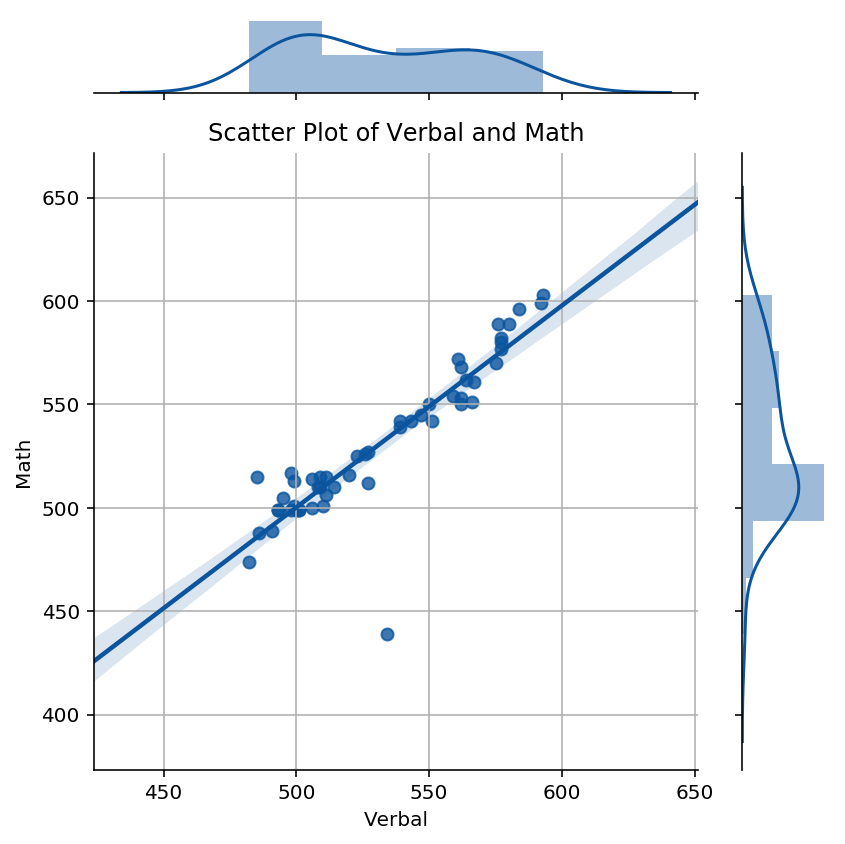

In [69]:
sns.jointplot("Verbal","Math",data=sat,kind="reg")
ax=plt.gca()
ax.set_title("Scatter Plot of Verbal and Math")
ax.grid(True)
plt.tight_layout()
plt.show()

**Answer:**
    
    In summary, pearsons correlation is calculated through the distance between the points and the best fit line drawn.
    
    Spearman correlation is calculated by ordering each columns of values based on a basic numeric rank and then using the sum of squared difference between the two ranks and spearman formula

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [70]:
np.percentile(sat["Rate"], 56.730769)

51.0

In [71]:
for counter, value in enumerate(sat['Rate']):
    sat.loc[counter,'Rate_Percentiles'] = stats.percentileofscore(sat['Rate'], value)
sat["Rate_Percentiles"]

0     100.000000
1      98.076923
2      96.153846
3      94.230769
4      92.307692
5      89.423077
6      89.423077
7      85.576923
8      85.576923
9      82.692308
10     80.769231
11     77.884615
12     77.884615
13     75.000000
14     73.076923
15     71.153846
16     69.230769
17     67.307692
18     65.384615
19     62.500000
20     62.500000
21     59.615385
22     56.730769
23     56.730769
24     51.923077
25     50.000000
26     48.076923
27     46.153846
28     44.230769
29     42.307692
30     40.384615
31     37.500000
32     37.500000
33     33.653846
34     33.653846
35     29.807692
36     29.807692
37     25.000000
38     25.000000
39     25.000000
40     19.230769
41     19.230769
42     19.230769
43     15.384615
44     12.500000
45     12.500000
46      8.653846
47      8.653846
48      3.846154
49      3.846154
50      3.846154
51     53.846154
Name: Rate_Percentiles, dtype: float64

In [72]:
sat[sat['State']=='CA']['Rate_Percentiles']

23    56.730769
Name: Rate_Percentiles, dtype: float64


**Answer:**
    
    Percentile ranks the highest value as 100, lowest as 0 and anything in between according to their respective values. This is similar to Spearman rank correlation, which also ranks the values according to the range. E.g. Rate (82) ranked as   highest, Rate (4) ranked as lowest).
    

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

#####   1. Why might percentile scoring be useful for dealing with outliers?
***Answer**
    
    Because outlier is an extreme or exception case which is not statistically belong to any group, it could skew the        percentile. Hence, based on the percentile, we can trace back to find outliers.

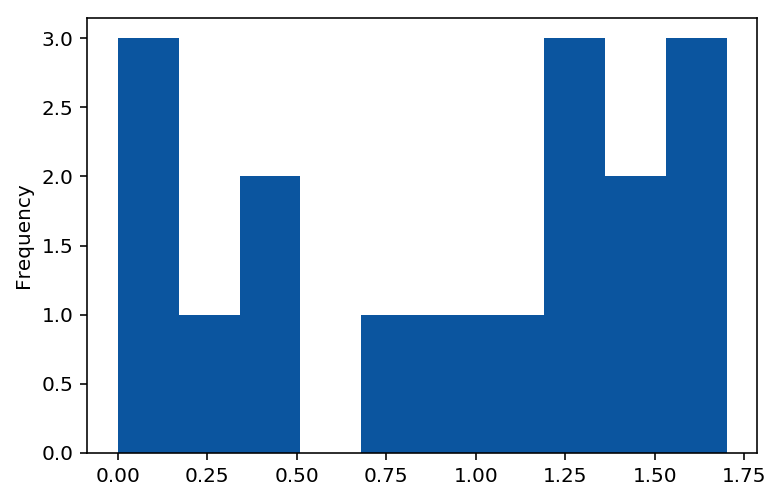

In [73]:
#  9.2. Plot the distribution of a variable of your choice from the drug use dataset.

oxy_use = drug_copy['oxy']
oxy_use.plot(kind='hist')

In [74]:
oxy_mean = oxy_use.mean()
oxy_std = oxy_use.std()

In [75]:
oxy_mean

0.9352941176470588

In [76]:
oxy_std

0.608215809222545

In [77]:
xpoints = np.linspace(oxy_mean - 5*oxy_std, oxy_mean + 5*oxy_std)
ypoints = stats.norm.pdf(xpoints, oxy_mean, oxy_std)

Text(0,0.5,'Prob Density')

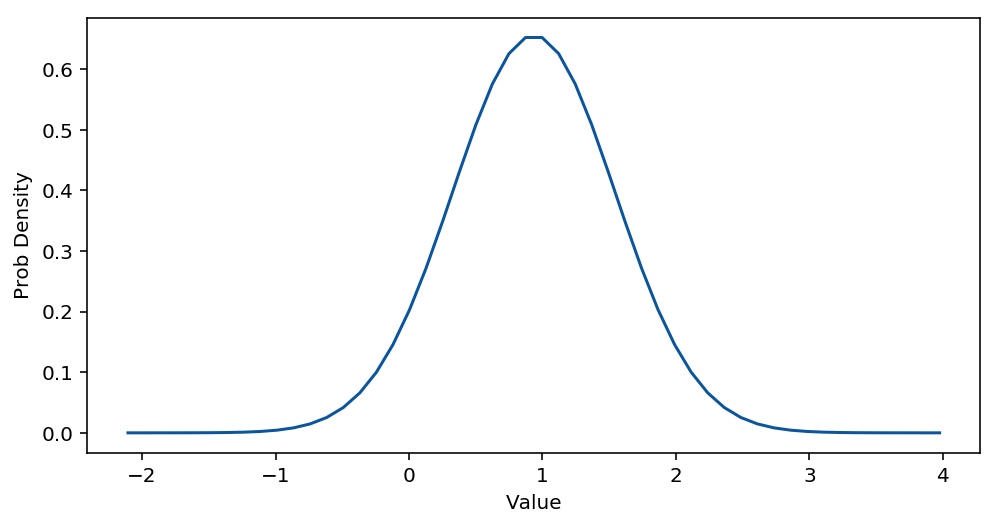

In [78]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(xpoints, ypoints)
plt.xlabel('Value')
plt.ylabel('Prob Density')

In [79]:
# 9.3. Plot the same variable but percentile scored.

In [80]:
oxy_use_percentile = oxy_use.apply(lambda x: stats.percentileofscore(oxy_use,x))

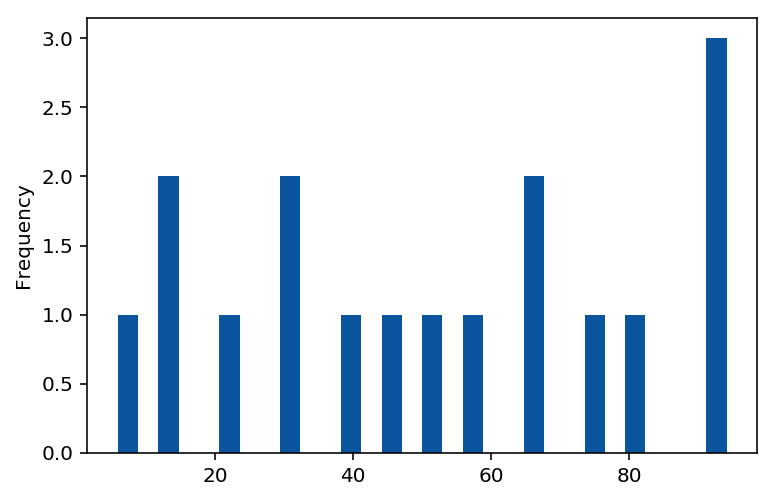

In [81]:
oxy_use_percentile.plot(kind='hist', bins=30)

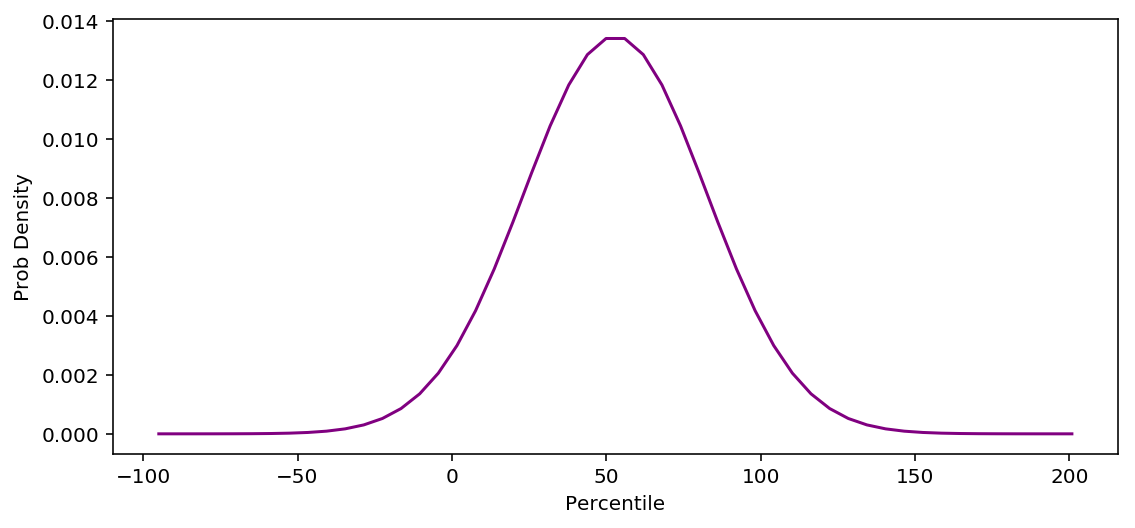

In [82]:
oxy_use_percentile_mean = oxy_use_percentile.mean()
oxy_use_percentile_std = oxy_use_percentile.std()

fig, ax = plt.subplots(figsize=(9,4))
xpoints = np.linspace(oxy_use_percentile_mean - 5*oxy_use_percentile_std, oxy_use_percentile_mean + 5*oxy_use_percentile_std)
ypoints = stats.norm.pdf(xpoints, oxy_use_percentile_mean, oxy_use_percentile_std)
plt.xlabel('Percentile')
plt.ylabel('Prob Density')
ax.plot(xpoints, ypoints, c='purple')
